In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('2018_2022_Main_Elec_Generation.csv')
df2 = pd.read_csv('2018_2022_Rooftop_PV_Elec_Generation.csv')

In [3]:
# join the 2 datasets of 2018-2022 electricity generation from main sources and rooftop pv
fiveyears_df = pd.concat([df1, df2], axis=0)
fiveyears_df

Year  Month Region      Fuel Source  Electricity Generation (MWh)
0    2022      1     SA  Battery storage                         26.69
1    2022      1     SA            Solar                        151.98
2    2022      1     SA           Fossil                       7203.53
3    2022      1    VIC           Fossil                        376.90
4    2022      1     SA           Fossil                        191.26
..    ...    ...    ...              ...                           ...
295  2022     12    NSW            Solar                     795479.05
296  2022     12    QLD            Solar                     713714.95
297  2022     12     SA            Solar                     342920.71
298  2022     12    TAS            Solar                      37384.91
299  2022     12    VIC            Solar                     576142.46

[17569 rows x 5 columns]

In [4]:
fiveyears_df.isnull().sum()

Year                            0
Month                           0
Region                          0
Fuel Source                     0
Electricity Generation (MWh)    0
dtype: int64

In [5]:
fiveyears_df.dtypes

Year                              int64
Month                             int64
Region                           object
Fuel Source                      object
Electricity Generation (MWh)    float64
dtype: object

In [6]:
# Aggregate the dataset by Year, Month, Region, Fuel Source, and sum the Electricity Generation (MWh)
aggregated_df = fiveyears_df.groupby(['Year', 'Month', 'Region', 'Fuel Source'])['Electricity Generation (MWh)'].sum().reset_index()
aggregated_df

Year  Month Region      Fuel Source  Electricity Generation (MWh)
0     2018      1    NSW           Fossil                    5611235.42
1     2018      1    NSW            Hydro                     255558.46
2     2018      1    NSW            Solar                     257139.39
3     2018      1    NSW             Wind                     151926.99
4     2018      1    QLD           Fossil                    5644044.22
...    ...    ...    ...              ...                           ...
1324  2022     12    VIC  Battery storage                       7183.06
1325  2022     12    VIC           Fossil                    2689215.99
1326  2022     12    VIC            Hydro                     159101.66
1327  2022     12    VIC            Solar                     754425.46
1328  2022     12    VIC             Wind                     810635.81

[1329 rows x 5 columns]

In [7]:
aggregated_df.to_csv('2018_2022_Elec_Generation.csv', index=False)

In [ ]:
# EDA of aggregated_df

In [8]:
aggregated_df.shape

(1329, 5)

In [9]:
pd.DataFrame(aggregated_df.dtypes, columns=['DataType'])

DataType
Year                            int64
Month                           int64
Region                         object
Fuel Source                    object
Electricity Generation (MWh)  float64

In [10]:
aggregated_df.index

RangeIndex(start=0, stop=1329, step=1)

In [11]:
aggregated_df['Region'].describe()

count     1329
unique       5
top        QLD
freq       307
Name: Region, dtype: object

In [12]:
aggregated_df['Region'].unique()

array(['NSW', 'QLD', 'SA', 'TAS', 'VIC'], dtype=object)

In [13]:
aggregated_df['Region'].value_counts()

QLD    307
VIC    290
NSW    255
SA     240
TAS    237
Name: Region, dtype: int64

In [14]:
aggregated_df['Fuel Source'].value_counts()

Solar                         300
Fossil                        297
Wind                          293
Hydro                         240
Battery storage               143
Renewable/ Biomass / Waste     56
Name: Fuel Source, dtype: int64

In [15]:
aggregated_df['Fuel Source'].describe()

count      1329
unique        6
top       Solar
freq        300
Name: Fuel Source, dtype: object

In [16]:
aggregated_df['Fuel Source'].unique()

array(['Fossil', 'Hydro', 'Solar', 'Wind', 'Renewable/ Biomass / Waste',
       'Battery storage'], dtype=object)

In [17]:
aggregated_df['Electricity Generation (MWh)'].describe()

count    1.329000e+03
mean     7.806138e+05
std      1.355457e+06
min      1.310000e+00
25%      4.932677e+04
50%      2.521020e+05
75%      5.898014e+05
max      5.863559e+06
Name: Electricity Generation (MWh), dtype: float64

Overall electricity generation - country level, 2018 - 2022

In [18]:
df_country = pd.read_csv('2018_2022_Elec_Generation.csv')

In [19]:
df_country

Year  Month Region      Fuel Source  Electricity Generation (MWh)
0     2018      1    NSW           Fossil                    5611235.42
1     2018      1    NSW            Hydro                     255558.46
2     2018      1    NSW            Solar                     257139.39
3     2018      1    NSW             Wind                     151926.99
4     2018      1    QLD           Fossil                    5644044.22
...    ...    ...    ...              ...                           ...
1324  2022     12    VIC  Battery storage                       7183.06
1325  2022     12    VIC           Fossil                    2689215.99
1326  2022     12    VIC            Hydro                     159101.66
1327  2022     12    VIC            Solar                     754425.46
1328  2022     12    VIC             Wind                     810635.81

[1329 rows x 5 columns]

In [20]:
# Categorise 'Hydro', 'Solar', 'Wind', 'Renewable/ Biomass / Waste' as 'Renewables generation'
# Categorise 'Fossil' as 'Fossil fuels generation'
# Sum the electricity generation by aggregating 'Year', 'Month', 'Renewables generation', 'Fossil fuels generation'
df_country['Fuel Source'] = df_country['Fuel Source'].replace(['Hydro', 'Solar', 'Wind', 'Renewable/ Biomass / Waste'], 'Renewables generation')
df_country['Fuel Source'] = df_country['Fuel Source'].replace(['Fossil'], 'Fossil fuels generation')
df_country = df_country.groupby(['Year','Fuel Source'])['Electricity Generation (MWh)'].sum().reset_index()
df_country

Year              Fuel Source  Electricity Generation (MWh)
0   2018          Battery storage                  4.149523e+04
1   2018  Fossil fuels generation                  1.653806e+08
2   2018    Renewables generation                  4.133606e+07
3   2019          Battery storage                  6.734155e+04
4   2019  Fossil fuels generation                  1.611898e+08
5   2019    Renewables generation                  4.672635e+07
6   2020          Battery storage                  8.541589e+04
7   2020  Fossil fuels generation                  1.504449e+08
8   2020    Renewables generation                  5.433098e+07
9   2021          Battery storage                  1.287988e+05
10  2021  Fossil fuels generation                  1.418318e+08
11  2021    Renewables generation                  6.445834e+07
12  2022          Battery storage                  2.764248e+05
13  2022  Fossil fuels generation                  1.377937e+08
14  2022    Renewables generation                  7.334374e+07

In [21]:
# Convert the 'Electricity Generation (MWh)' column from MWh to TWh
df_country['Electricity Generation (TWh)'] = df_country['Electricity Generation (MWh)'] / 1_000_000
df_country

Year              Fuel Source  Electricity Generation (MWh)  \
0   2018          Battery storage                  4.149523e+04   
1   2018  Fossil fuels generation                  1.653806e+08   
2   2018    Renewables generation                  4.133606e+07   
3   2019          Battery storage                  6.734155e+04   
4   2019  Fossil fuels generation                  1.611898e+08   
5   2019    Renewables generation                  4.672635e+07   
6   2020          Battery storage                  8.541589e+04   
7   2020  Fossil fuels generation                  1.504449e+08   
8   2020    Renewables generation                  5.433098e+07   
9   2021          Battery storage                  1.287988e+05   
10  2021  Fossil fuels generation                  1.418318e+08   
11  2021    Renewables generation                  6.445834e+07   
12  2022          Battery storage                  2.764248e+05   
13  2022  Fossil fuels generation                  1.377937e+08   
14  2022    Renewables generation                  7.334374e+07   

    Electricity Generation (TWh)  
0                       0.041495  
1                     165.380623  
2                      41.336057  
3                       0.067342  
4                     161.189797  
5                      46.726353  
6                       0.085416  
7                     150.444890  
8                      54.330975  
9                       0.128799  
10                    141.831806  
11                     64.458342  
12                      0.276425  
13                    137.793682  
14                     73.343738

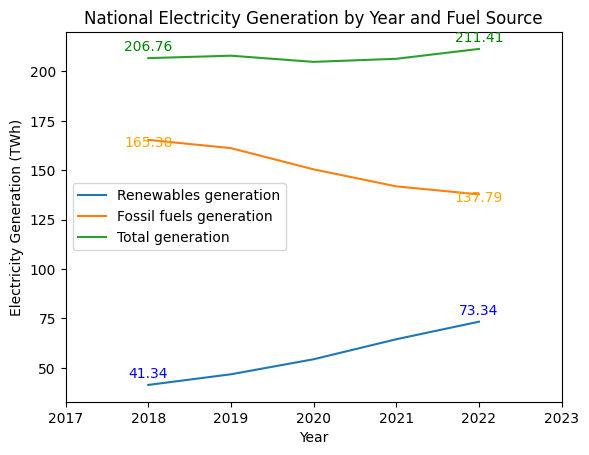

In [22]:
fig, ax = plt.subplots()

renewables = df_country[df_country['Fuel Source'] == 'Renewables generation']
fossil_fuels = df_country[df_country['Fuel Source'] == 'Fossil fuels generation']
battery_storage = df_country[df_country['Fuel Source'] == 'Battery storage']
# Calculate the total generation by summing renewables, fossil fuels, and battery storage
total_generation = df_country[df_country['Fuel Source'].isin(['Renewables generation', 'Fossil fuels generation', 'Battery storage'])].groupby('Year')['Electricity Generation (TWh)'].sum()

ax.plot(renewables['Year'], renewables['Electricity Generation (TWh)'], label='Renewables generation')
ax.plot(fossil_fuels['Year'], fossil_fuels['Electricity Generation (TWh)'], label='Fossil fuels generation')
ax.plot(total_generation.index, total_generation.values, label='Total generation')

ax.set_xlabel('Year')
ax.set_ylabel('Electricity Generation (TWh)')
ax.set_title('National Electricity Generation by Year and Fuel Source')
ax.legend()

# Add annotations for 2018 and 2022
renewables_2018 = renewables[renewables['Year'] == 2018]
fossil_fuels_2018 = fossil_fuels[fossil_fuels['Year'] == 2018]
total_2018 = total_generation[total_generation.index == 2018]

renewables_2022 = renewables[renewables['Year'] == 2022]
fossil_fuels_2022 = fossil_fuels[fossil_fuels['Year'] == 2022]
total_2022 = total_generation[total_generation.index == 2022]

ax.annotate(f"{renewables_2018['Electricity Generation (TWh)'].values[0]:.2f}",
            xy=(2018, renewables_2018['Electricity Generation (TWh)'].values[0]),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            color='blue')
ax.annotate(f"{fossil_fuels_2018['Electricity Generation (TWh)'].values[0]:.2f}",
            xy=(2018, fossil_fuels_2018['Electricity Generation (TWh)'].values[0]),
            xytext=(0, -5),
            textcoords='offset points',
            ha='center',
            color='orange')
ax.annotate(f"{total_2018.values[0]:.2f}",
            xy=(2018, total_2018.values[0]),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            color='green')

ax.annotate(f"{renewables_2022['Electricity Generation (TWh)'].values[0]:.2f}",
            xy=(2022, renewables_2022['Electricity Generation (TWh)'].values[0]),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            color='blue')
ax.annotate(f"{fossil_fuels_2022['Electricity Generation (TWh)'].values[0]:.2f}",
            xy=(2022, fossil_fuels_2022['Electricity Generation (TWh)'].values[0]),
            xytext=(0, -5),
            textcoords='offset points',
            ha='center',
            color='orange')
ax.annotate(f"{total_2022.values[0]:.2f}",
            xy=(2022, total_2022.values[0]),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            color='green')

# Set x-axis range from 2017 to 2023
ax.set_xlim(2017, 2023)

plt.show()


Overall electricity generation - state level, 2018 - 2022

In [23]:
df_state = pd.read_csv('2018_2022_Elec_Generation.csv')

In [24]:
df_state

Year  Month Region      Fuel Source  Electricity Generation (MWh)
0     2018      1    NSW           Fossil                    5611235.42
1     2018      1    NSW            Hydro                     255558.46
2     2018      1    NSW            Solar                     257139.39
3     2018      1    NSW             Wind                     151926.99
4     2018      1    QLD           Fossil                    5644044.22
...    ...    ...    ...              ...                           ...
1324  2022     12    VIC  Battery storage                       7183.06
1325  2022     12    VIC           Fossil                    2689215.99
1326  2022     12    VIC            Hydro                     159101.66
1327  2022     12    VIC            Solar                     754425.46
1328  2022     12    VIC             Wind                     810635.81

[1329 rows x 5 columns]

In [25]:
# Categorise 'Hydro', 'Solar', 'Wind', 'Renewable/ Biomass / Waste' as 'Renewables generation'
# Categorise 'Fossil' as 'Fossil fuels generation'
# Sum the electricity generation by aggregating 'Year', 'Month', 'Renewables generation', 'Fossil fuels generation'
df_state['Fuel Source'] = df_state['Fuel Source'].replace(['Hydro', 'Solar', 'Wind', 'Renewable/ Biomass / Waste'], 'Renewables generation')
df_state['Fuel Source'] = df_state['Fuel Source'].replace(['Fossil'], 'Fossil fuels generation')
df_state = df_state.groupby(['Year','Region','Fuel Source'])['Electricity Generation (MWh)'].sum().reset_index()
df_state

Year Region              Fuel Source  Electricity Generation (MWh)
0   2018    NSW  Fossil fuels generation                   58736832.22
1   2018    NSW    Renewables generation                    9050977.79
2   2018    QLD  Fossil fuels generation                   61682956.78
3   2018    QLD    Renewables generation                    4853746.04
4   2018     SA          Battery storage                      40107.90
..   ...    ...                      ...                           ...
59  2022    TAS  Fossil fuels generation                     100509.88
60  2022    TAS    Renewables generation                   10583187.86
61  2022    VIC          Battery storage                     143403.40
62  2022    VIC  Fossil fuels generation                   33899919.19
63  2022    VIC    Renewables generation                   18523716.57

[64 rows x 4 columns]

In [26]:
# Convert the 'Electricity Generation (MWh)' column from MWh to TWh
df_state['Electricity Generation (TWh)'] = df_state['Electricity Generation (MWh)'] / 1_000_000
df_state

Year Region              Fuel Source  Electricity Generation (MWh)  \
0   2018    NSW  Fossil fuels generation                   58736832.22   
1   2018    NSW    Renewables generation                    9050977.79   
2   2018    QLD  Fossil fuels generation                   61682956.78   
3   2018    QLD    Renewables generation                    4853746.04   
4   2018     SA          Battery storage                      40107.90   
..   ...    ...                      ...                           ...   
59  2022    TAS  Fossil fuels generation                     100509.88   
60  2022    TAS    Renewables generation                   10583187.86   
61  2022    VIC          Battery storage                     143403.40   
62  2022    VIC  Fossil fuels generation                   33899919.19   
63  2022    VIC    Renewables generation                   18523716.57   

    Electricity Generation (TWh)  
0                      58.736832  
1                       9.050978  
2                      61.682957  
3                       4.853746  
4                       0.040108  
..                           ...  
59                      0.100510  
60                     10.583188  
61                      0.143403  
62                     33.899919  
63                     18.523717  

[64 rows x 5 columns]

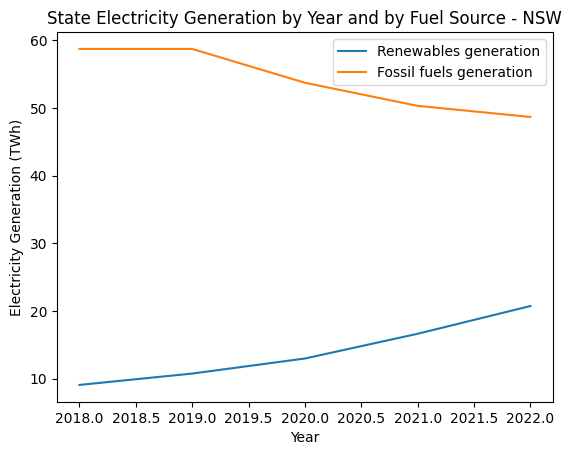

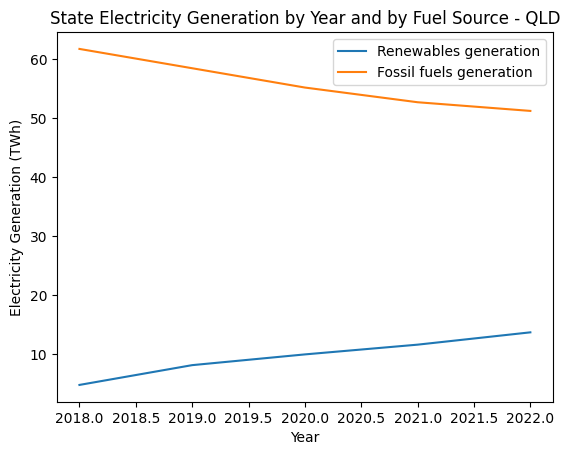

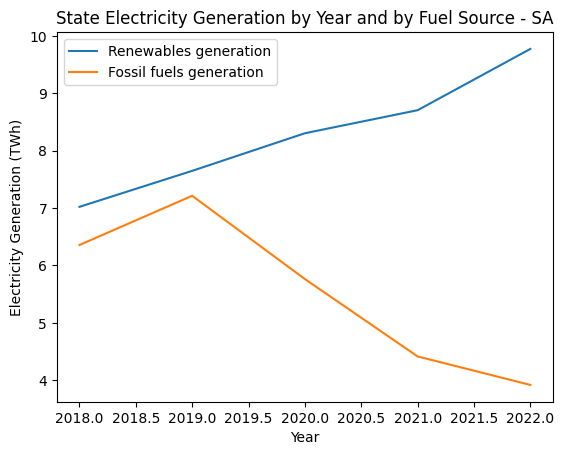

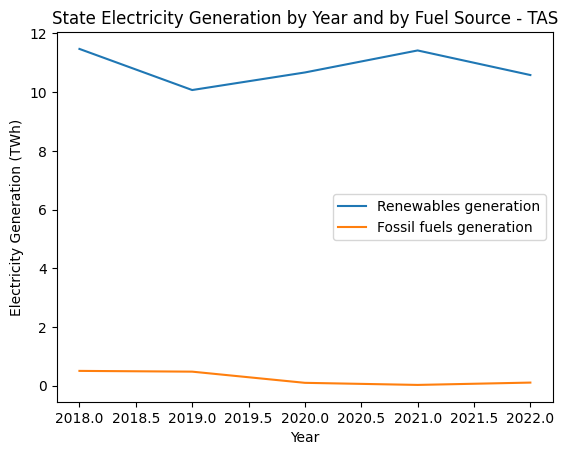

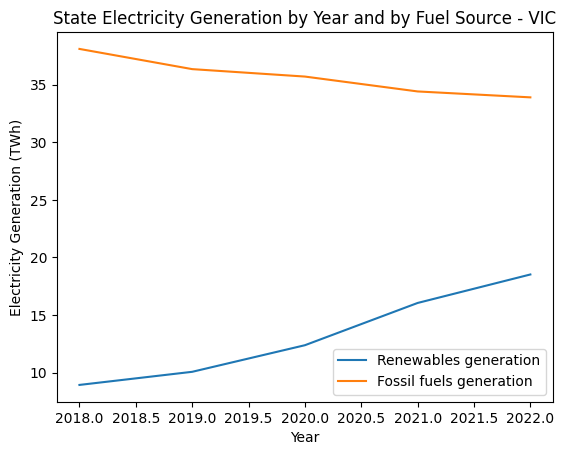

In [27]:
# Filter the DataFrame for 'Renewables generation' and 'Fossil fuels generation'
renewables = df_state[df_state['Fuel Source'] == 'Renewables generation']
fossil_fuels = df_state[df_state['Fuel Source'] == 'Fossil fuels generation']

# Plot the line graph
for region in df_state['Region'].unique():
    renewables_region = renewables[renewables['Region'] == region]
    fossil_fuels_region = fossil_fuels[fossil_fuels['Region'] == region]

    plt.plot(renewables_region['Year'], renewables_region['Electricity Generation (TWh)'], label='Renewables generation')
    plt.plot(fossil_fuels_region['Year'], fossil_fuels_region['Electricity Generation (TWh)'], label='Fossil fuels generation')
    plt.xlabel('Year')
    plt.ylabel('Electricity Generation (TWh)')
    plt.title(f'State Electricity Generation by Year and by Fuel Source - {region}')
    plt.legend()
    plt.show()

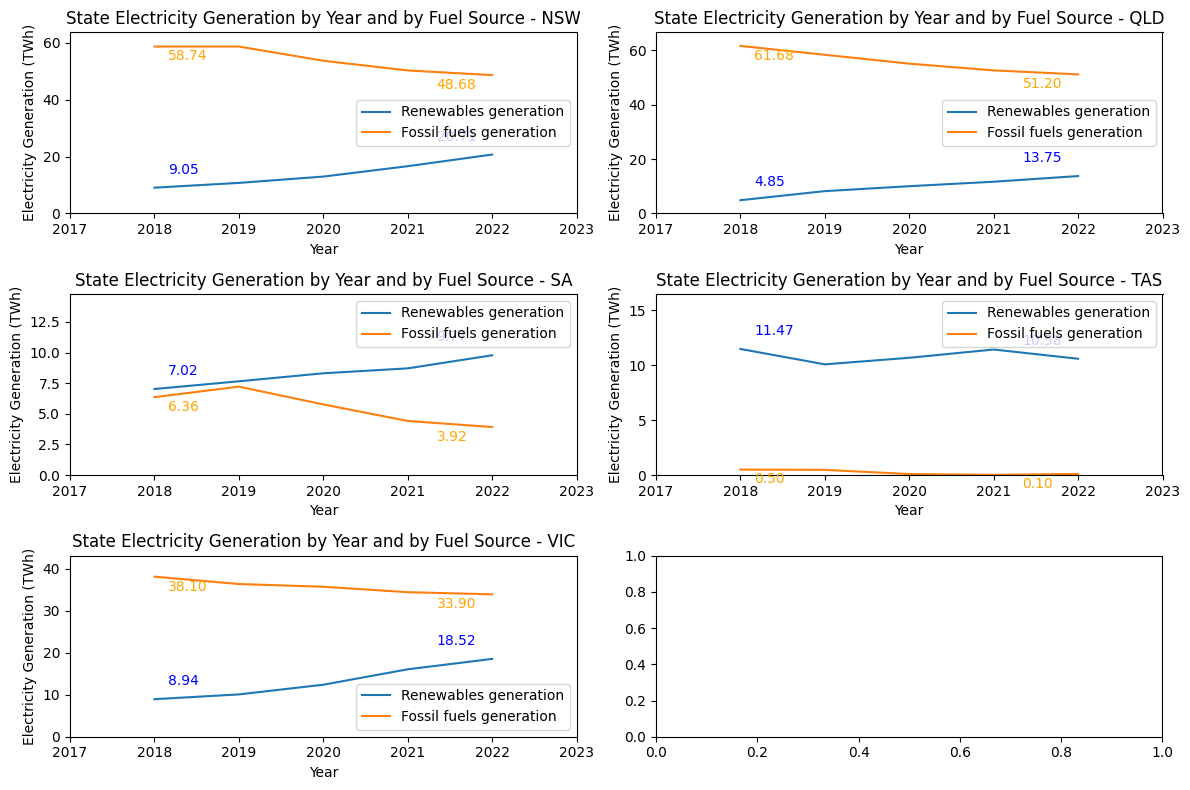

In [28]:
# Filter the DataFrame for 'Renewables generation' and 'Fossil fuels generation'
renewables = df_state[df_state['Fuel Source'] == 'Renewables generation']
fossil_fuels = df_state[df_state['Fuel Source'] == 'Fossil fuels generation']

# Get unique states
states = df_state['Region'].unique()

# Determine the number of subplots
num_plots = len(states)

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 2

# Determine the figure size
fig_width = 12
fig_height = 8

# Create subplots with the desired grid arrangement
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot the line graph for each state
for i, state in enumerate(states):
    renewables_state = renewables[renewables['Region'] == state]
    fossil_fuels_state = fossil_fuels[fossil_fuels['Region'] == state]

    # Set the current subplot
    plt.sca(axs[i])

    # Plot the renewables generation
    plt.plot(renewables_state['Year'], renewables_state['Electricity Generation (TWh)'], label='Renewables generation')

    # Plot the fossil fuels generation
    plt.plot(fossil_fuels_state['Year'], fossil_fuels_state['Electricity Generation (TWh)'], label='Fossil fuels generation')

    # Set the title and labels for the current subplot
    plt.xlabel('Year')
    plt.ylabel('Electricity Generation (TWh)')
    plt.title(f'State Electricity Generation by Year and by Fuel Source - {state}')

    # Add annotations for 2018 and 2022
    renewables_2018 = renewables_state[renewables_state['Year'] == 2018]
    fossil_fuels_2018 = fossil_fuels_state[fossil_fuels_state['Year'] == 2018]
    renewables_2022 = renewables_state[renewables_state['Year'] == 2022]
    fossil_fuels_2022 = fossil_fuels_state[fossil_fuels_state['Year'] == 2022]

    plt.annotate(f"{renewables_2018['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2018, renewables_2018['Electricity Generation (TWh)'].values[0]),
                 xytext=(10, 10),
                 textcoords='offset points',
                 color='blue')

    plt.annotate(f"{fossil_fuels_2018['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2018, fossil_fuels_2018['Electricity Generation (TWh)'].values[0]),
                 xytext=(10, -10),
                 textcoords='offset points',
                 color='orange')

    plt.annotate(f"{renewables_2022['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2022, renewables_2022['Electricity Generation (TWh)'].values[0]),
                 xytext=(-40, 10),
                 textcoords='offset points',
                 color='blue')

    plt.annotate(f"{fossil_fuels_2022['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2022, fossil_fuels_2022['Electricity Generation (TWh)'].values[0]),
                 xytext=(-40, -10),
                 textcoords='offset points',
                 color='orange')

    # Set the x-axis and y-axis limits for better visibility of annotations
    plt.xlim(2017, 2023)
    plt.ylim(0, max(renewables_state['Electricity Generation (TWh)'].max(),
                    fossil_fuels_state['Electricity Generation (TWh)'].max()) + 5)

    # Display the legend for the current subplot
    plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


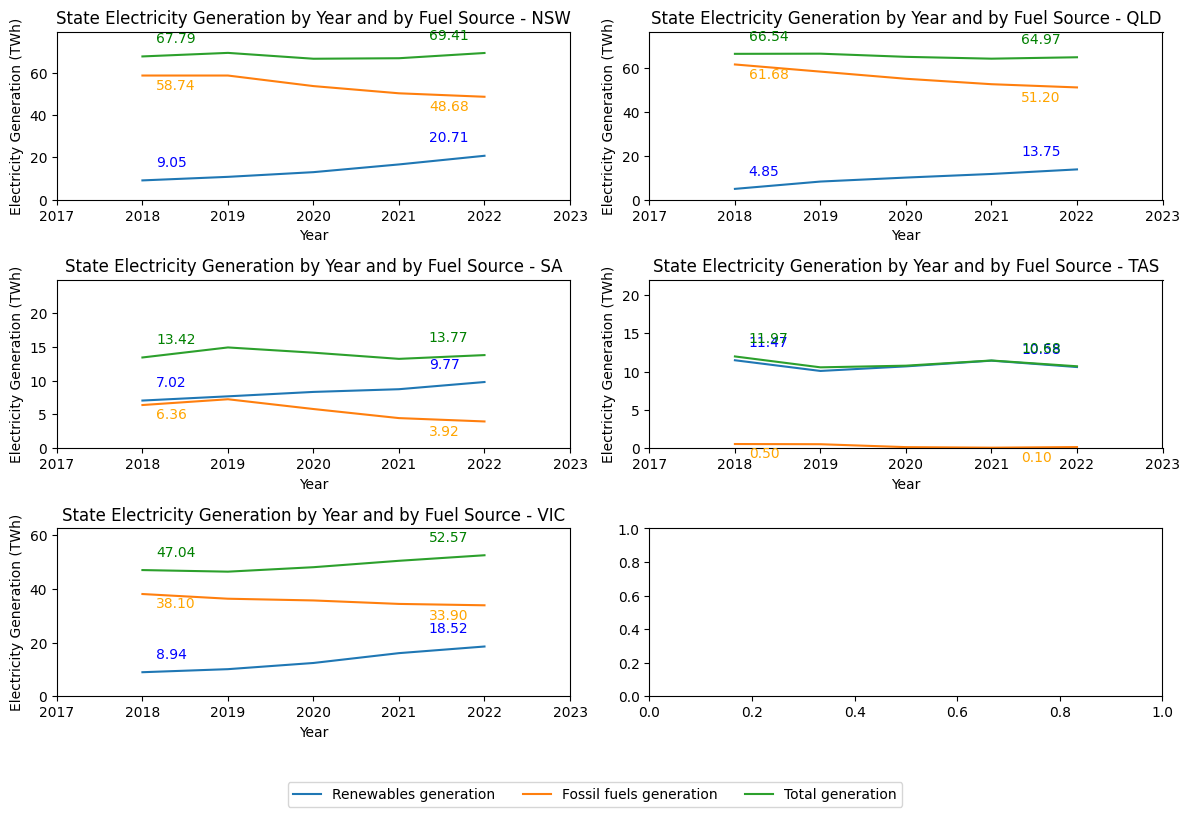

In [29]:
# Filter the DataFrame for 'Renewables generation' and 'Fossil fuels generation'
renewables = df_state[df_state['Fuel Source'] == 'Renewables generation']
fossil_fuels = df_state[df_state['Fuel Source'] == 'Fossil fuels generation']

# Get unique states
states = df_state['Region'].unique()

# Determine the number of subplots
num_plots = len(states)

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 2

# Determine the figure size
fig_width = 12
fig_height = 8

# Create subplots with the desired grid arrangement
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot the line graph for each state
for i, state in enumerate(states):
    renewables_state = renewables[renewables['Region'] == state]
    fossil_fuels_state = fossil_fuels[fossil_fuels['Region'] == state]

    # Calculate the total generation by summing renewables and fossil fuels from 2018 to 2022
    total_generation_state = df_state[(df_state['Region'] == state) &
                                      df_state['Fuel Source'].isin(['Renewables generation', 'Fossil fuels generation', 'Battery storage']) &
                                      df_state['Year'].between(2018, 2022)].groupby('Year')['Electricity Generation (TWh)'].sum()

    # Set the current subplot
    plt.sca(axs[i])

    # Plot the renewables generation
    renewables_line, = plt.plot(renewables_state['Year'], renewables_state['Electricity Generation (TWh)'], label='Renewables generation')

    # Plot the fossil fuels generation
    fossil_fuels_line, = plt.plot(fossil_fuels_state['Year'], fossil_fuels_state['Electricity Generation (TWh)'], label='Fossil fuels generation')

    # Plot the total generation
    total_generation_line, = plt.plot(total_generation_state.index, total_generation_state.values, label='Total generation')

    # Set the title and labels for the current subplot
    plt.xlabel('Year')
    plt.ylabel('Electricity Generation (TWh)')
    plt.title(f'State Electricity Generation by Year and by Fuel Source - {state}')

    # Add annotations for 2018 and 2022
    renewables_2018 = renewables_state[renewables_state['Year'] == 2018]
    fossil_fuels_2018 = fossil_fuels_state[fossil_fuels_state['Year'] == 2018]
    renewables_2022 = renewables_state[renewables_state['Year'] == 2022]
    fossil_fuels_2022 = fossil_fuels_state[fossil_fuels_state['Year'] == 2022]
    total_2018 = total_generation_state[total_generation_state.index == 2018]
    total_2022 = total_generation_state[total_generation_state.index == 2022]

    plt.annotate(f"{renewables_2018['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2018, renewables_2018['Electricity Generation (TWh)'].values[0]),
                 xytext=(10, 10),
                 textcoords='offset points',
                 color='blue')

    plt.annotate(f"{fossil_fuels_2018['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2018, fossil_fuels_2018['Electricity Generation (TWh)'].values[0]),
                 xytext=(10, -10),
                 textcoords='offset points',
                 color='orange')

    plt.annotate(f"{renewables_2022['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2022, renewables_2022['Electricity Generation (TWh)'].values[0]),
                 xytext=(-40, 10),
                 textcoords='offset points',
                 color='blue')

    plt.annotate(f"{fossil_fuels_2022['Electricity Generation (TWh)'].values[0]:.2f}",
                 xy=(2022, fossil_fuels_2022['Electricity Generation (TWh)'].values[0]),
                 xytext=(-40, -10),
                 textcoords='offset points',
                 color='orange')

    plt.annotate(f"{total_2018.values[0]:.2f}",
                 xy=(2018, total_2018.values[0]),
                 xytext=(10, 10),
                 textcoords='offset points',
                 color='green')

    plt.annotate(f"{total_2022.values[0]:.2f}",
                 xy=(2022, total_2022.values[0]),
                 xytext=(-40, 10),
                 textcoords='offset points',
                 color='green')

    # Set the x-axis and y-axis limits for better visibility of annotations
    plt.xlim(2017, 2023)
    plt.ylim(0, max(renewables_state['Electricity Generation (TWh)'].max(),
                    fossil_fuels_state['Electricity Generation (TWh)'].max(),
                    total_generation_state.max()) + 10)

# Create a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center', bbox_to_anchor=(0.5, 0), ncol=3)

# Adjust the spacing between subplots and below the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Show the plot
plt.show()

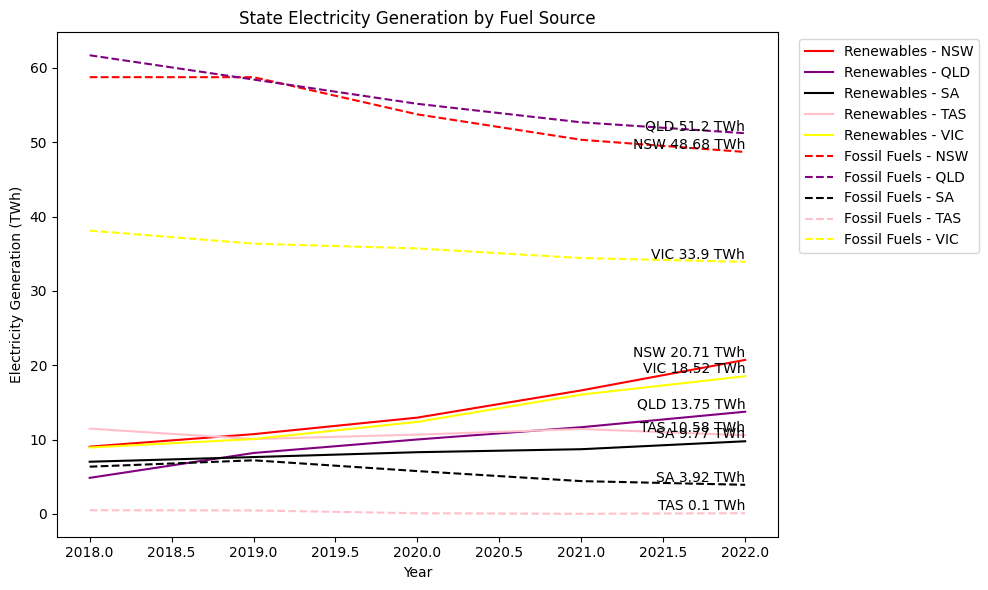

In [30]:
# Filter the DataFrame for 'Renewables generation' and 'Fossil fuels generation'
renewables = df_state[df_state['Fuel Source'] == 'Renewables generation']
fossil_fuels = df_state[df_state['Fuel Source'] == 'Fossil fuels generation']

# Get unique states
states = df_state['Region'].unique()

# Define a colormap
colormap = ['red', 'purple', 'black', 'pink', 'yellow']

# Plot the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot renewables
for i, state in enumerate(states):
    renewables_state = renewables[renewables['Region'] == state]
    plt.plot(renewables_state['Year'], renewables_state['Electricity Generation (TWh)'],
             label=f'Renewables - {state}', color=colormap[i])

    # Add text annotation for renewables in 2022
    renewables_2022 = renewables_state[renewables_state['Year'] == 2022]['Electricity Generation (TWh)']
    renewables_2022_rounded = round(renewables_2022.values[0], 2)
    plt.text(2022, renewables_2022, f"{state} {renewables_2022_rounded} TWh", ha='right', va='bottom')

# Plot fossil fuels
for i, state in enumerate(states):
    fossil_fuels_state = fossil_fuels[fossil_fuels['Region'] == state]
    plt.plot(fossil_fuels_state['Year'], fossil_fuels_state['Electricity Generation (TWh)'],
             label=f'Fossil Fuels - {state}', linestyle='dashed', color=colormap[i])

    # Add text annotation for fossil fuels in 2022
    fossil_fuels_2022 = fossil_fuels_state[fossil_fuels_state['Year'] == 2022]['Electricity Generation (TWh)']
    fossil_fuels_2022_rounded = round(fossil_fuels_2022.values[0], 2)
    plt.text(2022, fossil_fuels_2022, f"{state} {fossil_fuels_2022_rounded} TWh", ha='right', va='bottom')

plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('State Electricity Generation by Fuel Source')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


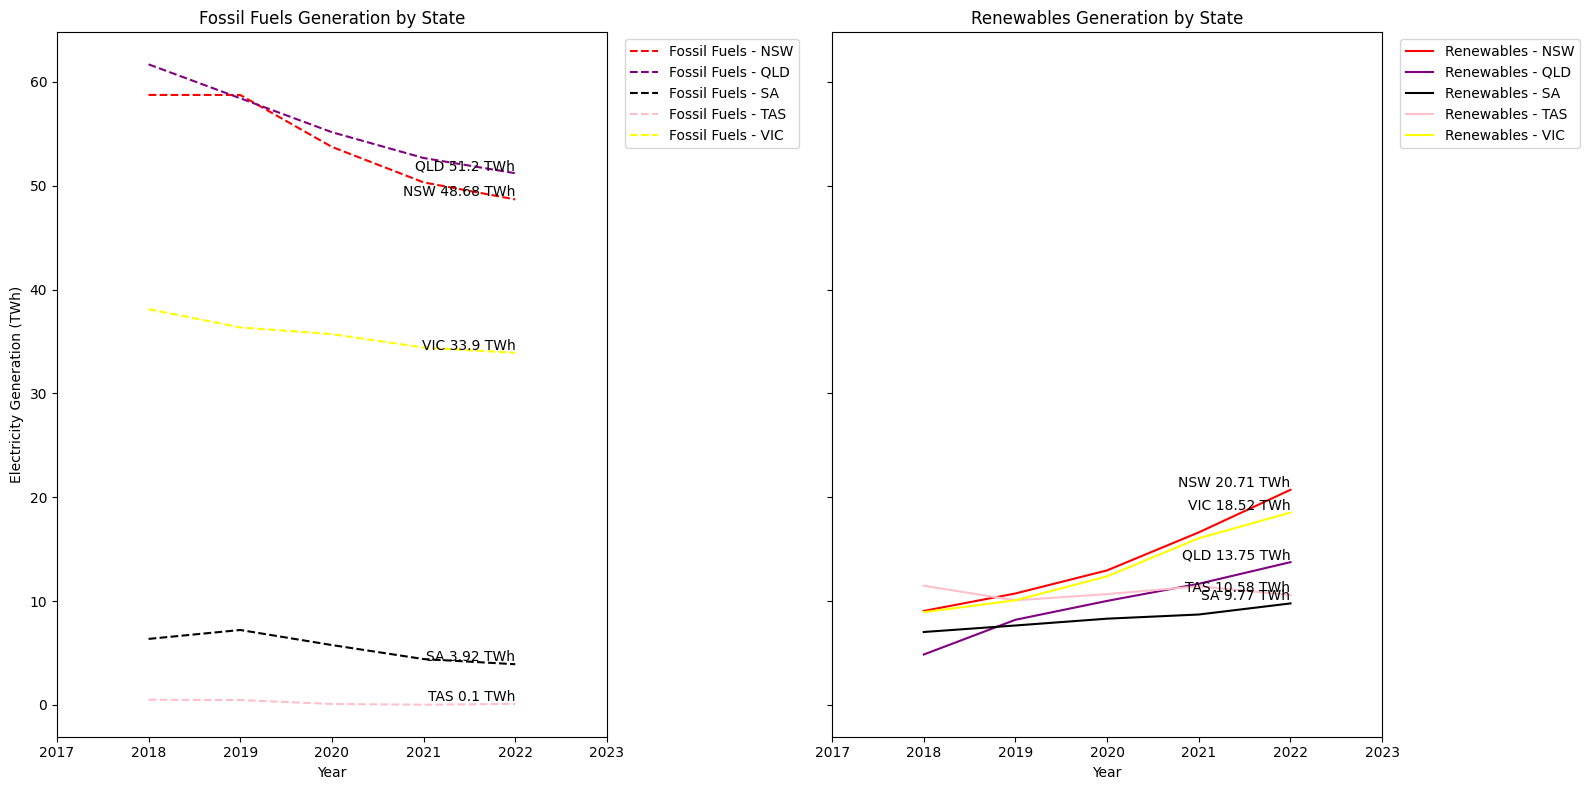

In [31]:
# Filter the DataFrame for 'Renewables generation' and 'Fossil fuels generation'
renewables = df_state[df_state['Fuel Source'] == 'Renewables generation']
fossil_fuels = df_state[df_state['Fuel Source'] == 'Fossil fuels generation']

# Get unique states
states = df_state['Region'].unique()

# Define a colormap
colormap = ['red', 'purple', 'black', 'pink', 'yellow']

# Create subplots for renewables and fossil fuels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot fossil fuels
for i, state in enumerate(states):
    fossil_fuels_state = fossil_fuels[fossil_fuels['Region'] == state]
    ax1.plot(fossil_fuels_state['Year'], fossil_fuels_state['Electricity Generation (TWh)'],
             label=f'Fossil Fuels - {state}', linestyle='dashed', color=colormap[i])

    # Add text annotation for fossil fuels in 2022
    fossil_fuels_2022 = fossil_fuels_state[fossil_fuels_state['Year'] == 2022]['Electricity Generation (TWh)']
    fossil_fuels_2022_rounded = round(fossil_fuels_2022.values[0], 2)
    ax1.text(2022, fossil_fuels_2022, f"{state} {fossil_fuels_2022_rounded} TWh", ha='right', va='bottom')

ax1.set_xlabel('Year')
ax1.set_ylabel('Electricity Generation (TWh)')
ax1.set_title('Fossil Fuels Generation by State')
ax1.set_xlim(2017, 2023)


# Plot renewables
for i, state in enumerate(states):
    renewables_state = renewables[renewables['Region'] == state]
    ax2.plot(renewables_state['Year'], renewables_state['Electricity Generation (TWh)'],
             label=f'Renewables - {state}', color=colormap[i])

    # Add text annotation for renewables in 2022
    renewables_2022 = renewables_state[renewables_state['Year'] == 2022]['Electricity Generation (TWh)']
    renewables_2022_rounded = round(renewables_2022.values[0], 2)
    ax2.text(2022, renewables_2022, f"{state} {renewables_2022_rounded} TWh", ha='right', va='bottom')

ax2.set_xlabel('Year')
ax2.set_title('Renewables Generation by State')
ax2.set_xlim(2017, 2023)


# Move the legends outside the graphs and align them in a single column
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()  # Ensures the legends are fully visible
plt.show()


Renewable electricity generation - country level, 2018 - 2022

In [32]:
df_renewables = pd.read_csv('2018_2022_Elec_Generation.csv')

In [33]:
df_renewables

Year  Month Region      Fuel Source  Electricity Generation (MWh)
0     2018      1    NSW           Fossil                    5611235.42
1     2018      1    NSW            Hydro                     255558.46
2     2018      1    NSW            Solar                     257139.39
3     2018      1    NSW             Wind                     151926.99
4     2018      1    QLD           Fossil                    5644044.22
...    ...    ...    ...              ...                           ...
1324  2022     12    VIC  Battery storage                       7183.06
1325  2022     12    VIC           Fossil                    2689215.99
1326  2022     12    VIC            Hydro                     159101.66
1327  2022     12    VIC            Solar                     754425.46
1328  2022     12    VIC             Wind                     810635.81

[1329 rows x 5 columns]

In [34]:
# Convert the 'Electricity Generation (MWh)' column from MWh to TWh
df_renewables['Electricity Generation (TWh)'] = df_renewables['Electricity Generation (MWh)'] / 1_000_000
df_renewables

Year  Month Region      Fuel Source  Electricity Generation (MWh)  \
0     2018      1    NSW           Fossil                    5611235.42   
1     2018      1    NSW            Hydro                     255558.46   
2     2018      1    NSW            Solar                     257139.39   
3     2018      1    NSW             Wind                     151926.99   
4     2018      1    QLD           Fossil                    5644044.22   
...    ...    ...    ...              ...                           ...   
1324  2022     12    VIC  Battery storage                       7183.06   
1325  2022     12    VIC           Fossil                    2689215.99   
1326  2022     12    VIC            Hydro                     159101.66   
1327  2022     12    VIC            Solar                     754425.46   
1328  2022     12    VIC             Wind                     810635.81   

      Electricity Generation (TWh)  
0                         5.611235  
1                         0.255558  
2                         0.257139  
3                         0.151927  
4                         5.644044  
...                            ...  
1324                      0.007183  
1325                      2.689216  
1326                      0.159102  
1327                      0.754425  
1328                      0.810636  

[1329 rows x 6 columns]

In [35]:
# Group the DataFrame by 'Year' and 'Fuel Source' and sum the 'Electricity Generation (TWh)' column
df_renewables_agg1 = df_renewables.groupby(['Year', 'Fuel Source'])['Electricity Generation (TWh)'].sum().reset_index()
df_renewables_agg1

Year                 Fuel Source  Electricity Generation (TWh)
0   2018             Battery storage                      0.041495
1   2018                      Fossil                    165.380623
2   2018                       Hydro                     16.707750
3   2018  Renewable/ Biomass / Waste                      0.233136
4   2018                       Solar                     10.080742
5   2018                        Wind                     14.314429
6   2019             Battery storage                      0.067342
7   2019                      Fossil                    161.189797
8   2019                       Hydro                     13.730867
9   2019  Renewable/ Biomass / Waste                      0.238006
10  2019                       Solar                     15.822304
11  2019                        Wind                     16.935176
12  2020             Battery storage                      0.085416
13  2020                      Fossil                    150.444890
14  2020                       Hydro                     14.315801
15  2020  Renewable/ Biomass / Waste                      0.184568
16  2020                       Solar                     20.150215
17  2020                        Wind                     19.680392
18  2021             Battery storage                      0.128799
19  2021                      Fossil                    141.831806
20  2021                       Hydro                     15.809114
21  2021  Renewable/ Biomass / Waste                      0.183140
22  2021                       Solar                     25.502645
23  2021                        Wind                     22.963443
24  2022             Battery storage                      0.276425
25  2022                      Fossil                    137.793682
26  2022                       Hydro                     16.642638
27  2022  Renewable/ Biomass / Waste                      0.153838
28  2022                       Solar                     30.607467
29  2022                        Wind                     25.939795

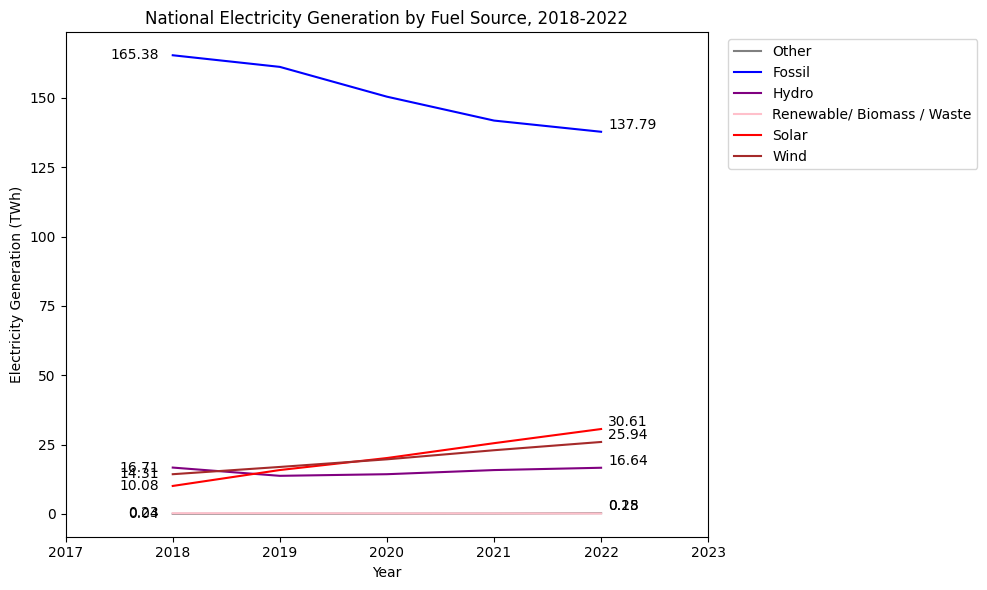

In [36]:
# Replace the fuel source 'Battery' as 'Other'
df_renewables_agg1['Fuel Source'] = df_renewables_agg1['Fuel Source'].replace('Battery storage', 'Other')

# Get unique fuel sources
fuel_sources = df_renewables_agg1['Fuel Source'].unique()
#fuel_sources = np.setdiff1d(df_renewables_agg1['Fuel Source'].unique(), ['Battery storage'])

# Define a colormap
colormap = ['grey', 'blue', 'purple', 'pink', 'red', 'brown']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each fuel source
for i, fuel_source in enumerate(fuel_sources):
    fuel_source_data = df_renewables_agg1[df_renewables_agg1['Fuel Source'] == fuel_source]
    ax.plot(fuel_source_data['Year'], fuel_source_data['Electricity Generation (TWh)'],
            label=fuel_source, color=colormap[i % len(colormap)])

    # Add text annotation for 2018
    generation_2018 = fuel_source_data[fuel_source_data['Year'] == 2018]['Electricity Generation (TWh)']
    generation_2018_rounded = round(generation_2018.values[0], 2)
    ax.annotate(f"{generation_2018_rounded}", xy=(2018, generation_2018),
                xytext=(-10, -5), textcoords='offset points', ha='right', va='bottom')

    # Add text annotation for 2022
    generation_2022 = fuel_source_data[fuel_source_data['Year'] == 2022]['Electricity Generation (TWh)']
    generation_2022_rounded = round(generation_2022.values[0], 2)
    ax.annotate(f"{generation_2022_rounded}", xy=(2022, generation_2022),
                xytext=(5, 0), textcoords='offset points', ha='left', va='bottom')

ax.set_xlabel('Year')
ax.set_ylabel('Electricity Generation (TWh)')
ax.set_title('National Electricity Generation by Fuel Source, 2018-2022')
ax.set_xlim(2017, 2023)

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Display the graph
plt.show()

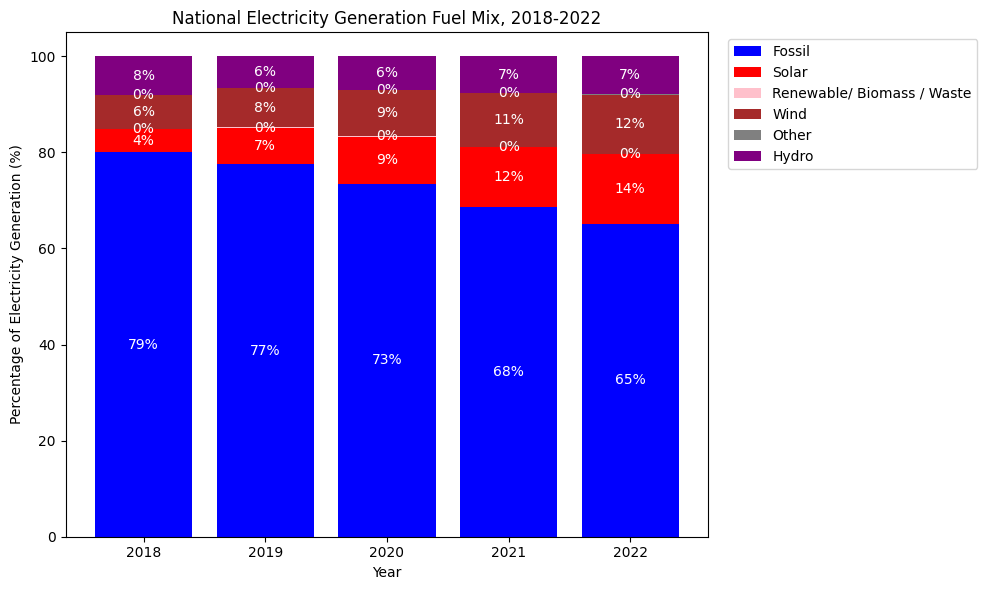

In [37]:
# Pivot the filtered data to have years as columns and fuel sources as rows
df_pivot = df_renewables_agg1.pivot(index='Fuel Source', columns='Year', values='Electricity Generation (TWh)')

# Calculate the percentage of electricity generation for each fuel source in each year
df_percentage = df_pivot.div(df_pivot.sum(axis=0), axis=1) * 100

# Define the x-axis positions for the bars
x = np.arange(len(df_percentage.columns))

# Define the desired order of fuel sources
fuel_source_order = ['Fossil', 'Solar', 'Renewable/ Biomass / Waste', 'Wind', 'Other', 'Hydro']

# Define a colormap
colormap = ['blue', 'red', 'pink', 'brown', 'grey', 'purple']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the fuel sources and plot the stacked bars in the desired order
bottom = np.zeros(len(df_percentage.columns))  # Starting point for each bar segment
for i, fuel_source in enumerate(fuel_source_order):
    bars = ax.bar(x, df_percentage.loc[fuel_source], bottom=bottom,
                  label=fuel_source, color=colormap[i])
    bottom += df_percentage.loc[fuel_source]  # Update the starting point for the next segment
    
    # Add text annotations for the percentage values within the bars
    for j, bar in enumerate(bars):
        percentage = df_percentage.loc[fuel_source].iloc[j]  # Use .iloc[j] to access the value by integer index
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                f'{int(percentage)}%', ha='center', va='center', color='white')

ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Electricity Generation (%)')
ax.set_title('National Electricity Generation Fuel Mix, 2018-2022')

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(df_percentage.columns)

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Display the graph
plt.show()


In [38]:
df_renewables_agg2 = df_renewables_agg1[~df_renewables_agg1['Fuel Source'].isin(['Fossil', 'Battery storage'])].copy()
df_renewables_agg2.reset_index(drop=True, inplace=True)
df_renewables_agg2

Year                 Fuel Source  Electricity Generation (TWh)
0   2018                       Other                      0.041495
1   2018                       Hydro                     16.707750
2   2018  Renewable/ Biomass / Waste                      0.233136
3   2018                       Solar                     10.080742
4   2018                        Wind                     14.314429
5   2019                       Other                      0.067342
6   2019                       Hydro                     13.730867
7   2019  Renewable/ Biomass / Waste                      0.238006
8   2019                       Solar                     15.822304
9   2019                        Wind                     16.935176
10  2020                       Other                      0.085416
11  2020                       Hydro                     14.315801
12  2020  Renewable/ Biomass / Waste                      0.184568
13  2020                       Solar                     20.150215
14  2020                        Wind                     19.680392
15  2021                       Other                      0.128799
16  2021                       Hydro                     15.809114
17  2021  Renewable/ Biomass / Waste                      0.183140
18  2021                       Solar                     25.502645
19  2021                        Wind                     22.963443
20  2022                       Other                      0.276425
21  2022                       Hydro                     16.642638
22  2022  Renewable/ Biomass / Waste                      0.153838
23  2022                       Solar                     30.607467
24  2022                        Wind                     25.939795

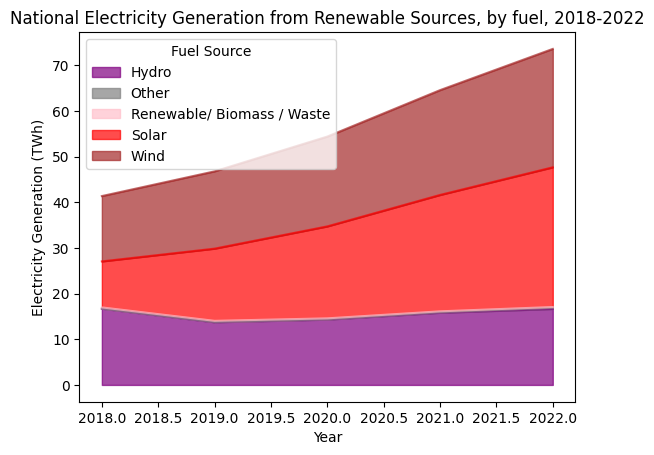

In [39]:
# Define colors for each fuel source
colors = ['purple', 'grey', 'pink', 'red', 'brown']

# Pivot the dataframe for plotting
df_renewables_pivot = df_renewables_agg2.pivot(index='Year', columns='Fuel Source', values='Electricity Generation (TWh)')

# Plot the area map with custom colors
ax = df_renewables_pivot.plot.area(stacked=True, alpha=0.7, color=colors)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('National Electricity Generation from Renewable Sources, by fuel, 2018-2022')

# Show the plot
plt.show()


Renewable electricity generation - state level, 2018 - 2022

In [40]:
df_renewables

Year  Month Region      Fuel Source  Electricity Generation (MWh)  \
0     2018      1    NSW           Fossil                    5611235.42   
1     2018      1    NSW            Hydro                     255558.46   
2     2018      1    NSW            Solar                     257139.39   
3     2018      1    NSW             Wind                     151926.99   
4     2018      1    QLD           Fossil                    5644044.22   
...    ...    ...    ...              ...                           ...   
1324  2022     12    VIC  Battery storage                       7183.06   
1325  2022     12    VIC           Fossil                    2689215.99   
1326  2022     12    VIC            Hydro                     159101.66   
1327  2022     12    VIC            Solar                     754425.46   
1328  2022     12    VIC             Wind                     810635.81   

      Electricity Generation (TWh)  
0                         5.611235  
1                         0.255558  
2                         0.257139  
3                         0.151927  
4                         5.644044  
...                            ...  
1324                      0.007183  
1325                      2.689216  
1326                      0.159102  
1327                      0.754425  
1328                      0.810636  

[1329 rows x 6 columns]

In [41]:
df_renewables_agg3 = df_renewables.groupby(['Year', 'Region', 'Fuel Source'])['Electricity Generation (TWh)'].sum().reset_index()
df_renewables_agg3['Fuel Source'] = df_renewables_agg3['Fuel Source'].replace('Battery storage', 'Other')
df_renewables_agg3

Year Region Fuel Source  Electricity Generation (TWh)
0    2018    NSW      Fossil                     58.736832
1    2018    NSW       Hydro                      2.895035
2    2018    NSW       Solar                      3.086917
3    2018    NSW        Wind                      3.069026
4    2018    QLD      Fossil                     61.682957
..    ...    ...         ...                           ...
109  2022    VIC       Other                      0.143403
110  2022    VIC      Fossil                     33.899919
111  2022    VIC       Hydro                      3.226143
112  2022    VIC       Solar                      5.542646
113  2022    VIC        Wind                      9.754928

[114 rows x 4 columns]

In [42]:
# Calculate the total electricity generation for each region and year
df_total_generation = df_renewables_agg3.groupby(['Region', 'Year'])['Electricity Generation (TWh)'].sum()

# Merge the total generation values back to the original dataframe
df_renewables_agg3 = df_renewables_agg3.merge(df_total_generation, on=['Region', 'Year'], suffixes=('', '_total'))

# Calculate the percentage of electricity generation for each fuel source out of the total for each region and year
df_renewables_agg3['Share by Year & Region'] = (df_renewables_agg3['Electricity Generation (TWh)'] / df_renewables_agg3['Electricity Generation (TWh)_total']) * 100

df_renewables_agg3

Year Region Fuel Source  Electricity Generation (TWh)  \
0    2018    NSW      Fossil                     58.736832   
1    2018    NSW       Hydro                      2.895035   
2    2018    NSW       Solar                      3.086917   
3    2018    NSW        Wind                      3.069026   
4    2018    QLD      Fossil                     61.682957   
..    ...    ...         ...                           ...   
109  2022    VIC       Other                      0.143403   
110  2022    VIC      Fossil                     33.899919   
111  2022    VIC       Hydro                      3.226143   
112  2022    VIC       Solar                      5.542646   
113  2022    VIC        Wind                      9.754928   

     Electricity Generation (TWh)_total  Share by Year & Region  
0                             67.787810               86.648075  
1                             67.787810                4.270730  
2                             67.787810                4.553793  
3                             67.787810                4.527402  
4                             66.536703               92.705160  
..                                  ...                     ...  
109                           52.567039                0.272801  
110                           52.567039               64.488926  
111                           52.567039                6.137197  
112                           52.567039               10.543956  
113                           52.567039               18.557119  

[114 rows x 6 columns]

In [43]:
df_renewables_agg3.dtypes

Year                                    int64
Region                                 object
Fuel Source                            object
Electricity Generation (TWh)          float64
Electricity Generation (TWh)_total    float64
Share by Year & Region                float64
dtype: object

In [44]:
df_renewables_agg3['Fuel Source'].unique()

array(['Fossil', 'Hydro', 'Solar', 'Wind', 'Renewable/ Biomass / Waste',
       'Other'], dtype=object)

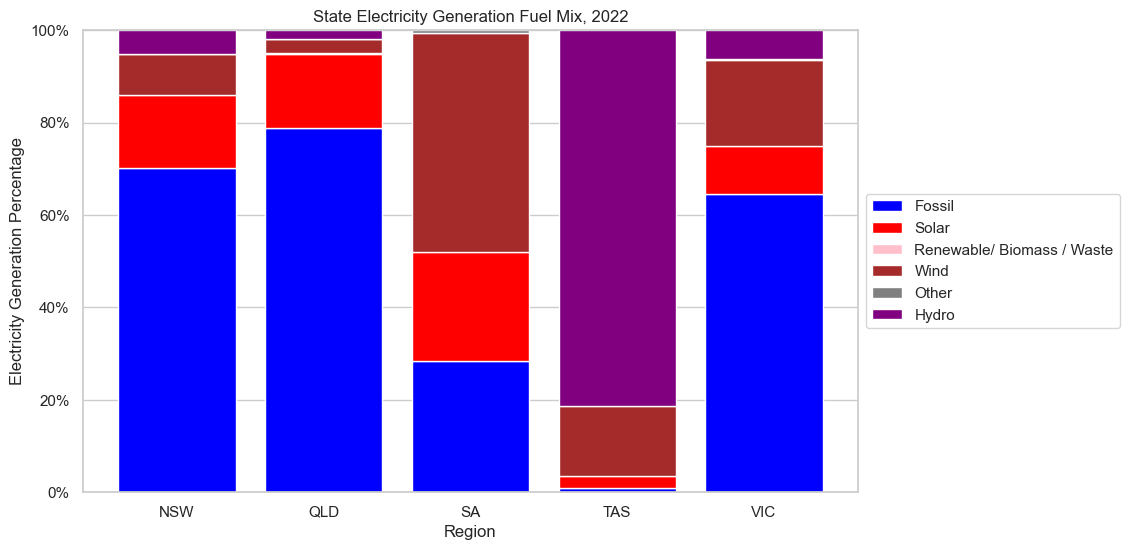

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Step 1: Filter data for the Year 2022
df_2022 = df_renewables_agg3[df_renewables_agg3['Year'] == 2022]

# Step 2: Create a pivot table
pivot_table = df_2022.pivot(index='Region', columns='Fuel Source', values='Share by Year & Region')

# Step 3: Set up the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Step 4: Create stacked bar graph
fuel_sources = ['Fossil', 'Solar', 'Renewable/ Biomass / Waste', 'Wind', 'Other', 'Hydro']
regions = pivot_table.index
x = regions  # Use region names for the x-axis

# Iterate over fuel sources to create stacked bars
colors = ['blue', 'red', 'pink', 'brown', 'grey', 'purple']
for i, fuel_source in enumerate(fuel_sources):
    values = pivot_table[fuel_source]
    plt.bar(x, values, bottom=pivot_table[fuel_sources[:i]].sum(axis=1), label=fuel_source, color=colors[i])

# Set axis labels and title
plt.xlabel('Region')
plt.ylabel('Electricity Generation Percentage')
plt.title('State Electricity Generation Fuel Mix, 2022')

# Set Y-axis tick format as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Set legend
plt.legend()
# Move the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


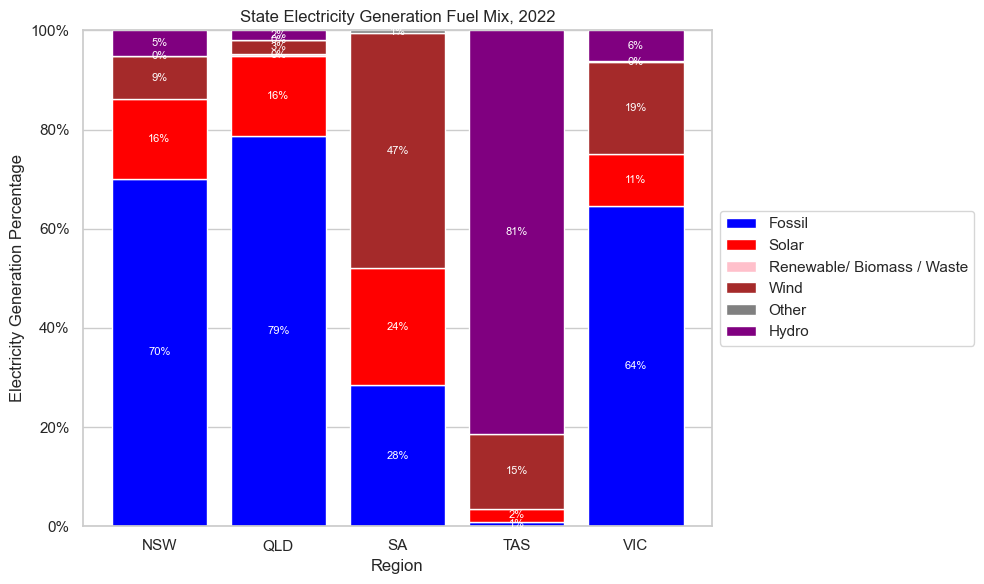

In [46]:
import seaborn as sns
import matplotlib.ticker as ticker

# Step 1: Filter data for the Year 2022
df_2022 = df_renewables_agg3[df_renewables_agg3['Year'] == 2022]

# Step 2: Create a pivot table
pivot_table = df_2022.pivot(index='Region', columns='Fuel Source', values='Share by Year & Region')

# Step 3: Set up the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Step 4: Create stacked bar graph
fuel_sources = ['Fossil', 'Solar', 'Renewable/ Biomass / Waste', 'Wind', 'Other', 'Hydro']
regions = pivot_table.index
x = regions  # Use region names for the x-axis

# Iterate over fuel sources to create stacked bars
colors = ['blue', 'red', 'pink', 'brown', 'grey', 'purple']
for i, fuel_source in enumerate(fuel_sources):
    values = pivot_table[fuel_source]
    plt.bar(x, values, bottom=pivot_table[fuel_sources[:i]].sum(axis=1), label=fuel_source, color=colors[i])

    # Add text annotations to each bar
    for j, value in enumerate(values):
        plt.text(j, pivot_table[fuel_sources[:i]].sum(axis=1)[j] + value / 2, f'{value:.0f}%',
                 ha='center', va='center', color='white', fontsize=8)

# Set axis labels and title
plt.xlabel('Region')
plt.ylabel('Electricity Generation Percentage')
plt.title('State Electricity Generation Fuel Mix, 2022')

# Set Y-axis tick format as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Move the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set tight layout to ensure the labels and annotations fit within the figure
plt.tight_layout()

# Show the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

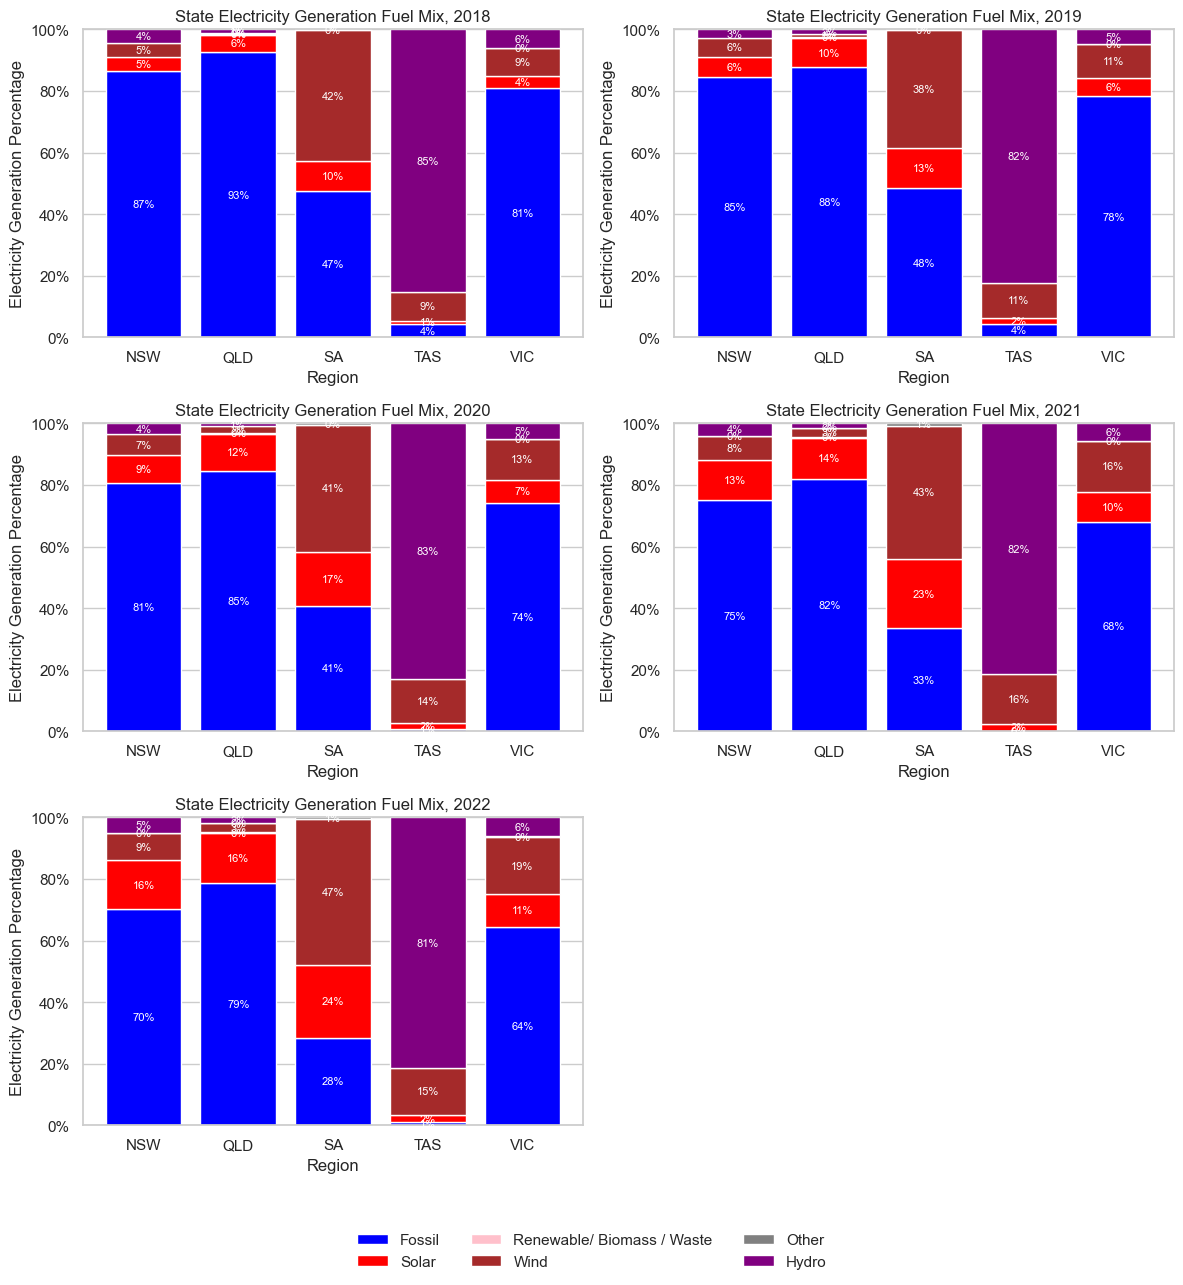

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create subplots with 2 columns and 3 rows
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Iterate over the years
for year, ax in zip(range(2018, 2023), axes.flatten()):
    # Filter data for the current year
    if 'Region' in df_renewables_agg3.columns:
        df_year = df_renewables_agg3[df_renewables_agg3['Year'] == year]
    else:
        # Handle the case when 'Region' column is not present
        print("'Region' column not found in the DataFrame.")
        break

    # Create a pivot table
    pivot_table = df_year.pivot(index='Region', columns='Fuel Source', values='Share by Year & Region')

    # Create stacked bar graph
    fuel_sources = ['Fossil', 'Solar', 'Renewable/ Biomass / Waste', 'Wind', 'Other', 'Hydro']
    regions = pivot_table.index
    x = regions

    colors = ['blue', 'red', 'pink', 'brown', 'grey', 'purple']
    for i, fuel_source in enumerate(fuel_sources):
        values = pivot_table[fuel_source]
        ax.bar(x, values, bottom=pivot_table[fuel_sources[:i]].sum(axis=1), color=colors[i])

        # Add text annotations to each bar
        for j, value in enumerate(values):
            ax.text(j, pivot_table[fuel_sources[:i]].sum(axis=1)[j] + value / 2, f'{value:.0f}%',
                     ha='center', va='center', color='white', fontsize=8)

    # Set axis labels and title
    ax.set_xlabel('Region')
    ax.set_ylabel('Electricity Generation Percentage')
    ax.set_title(f'State Electricity Generation Fuel Mix, {year}')

    # Set Y-axis tick format as percentage
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Create a separate legend outside the subplots
legend_labels = ['Fossil', 'Solar', 'Renewable/ Biomass / Waste', 'Wind', 'Other', 'Hydro']
fig.legend(legend_labels, loc='center', ncol=3, bbox_to_anchor=(0.5, -0.05), frameon=False)

# Remove any extra subplots if the number of years is not a multiple of 6
if len(df_renewables_agg2['Year'].unique()) % 6 != 0:
    for ax in axes.flatten()[len(df_renewables_agg2['Year'].unique()):]:
        fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Apply tight layout to the entire figure
fig.tight_layout()

# Show the plot
plt.show()


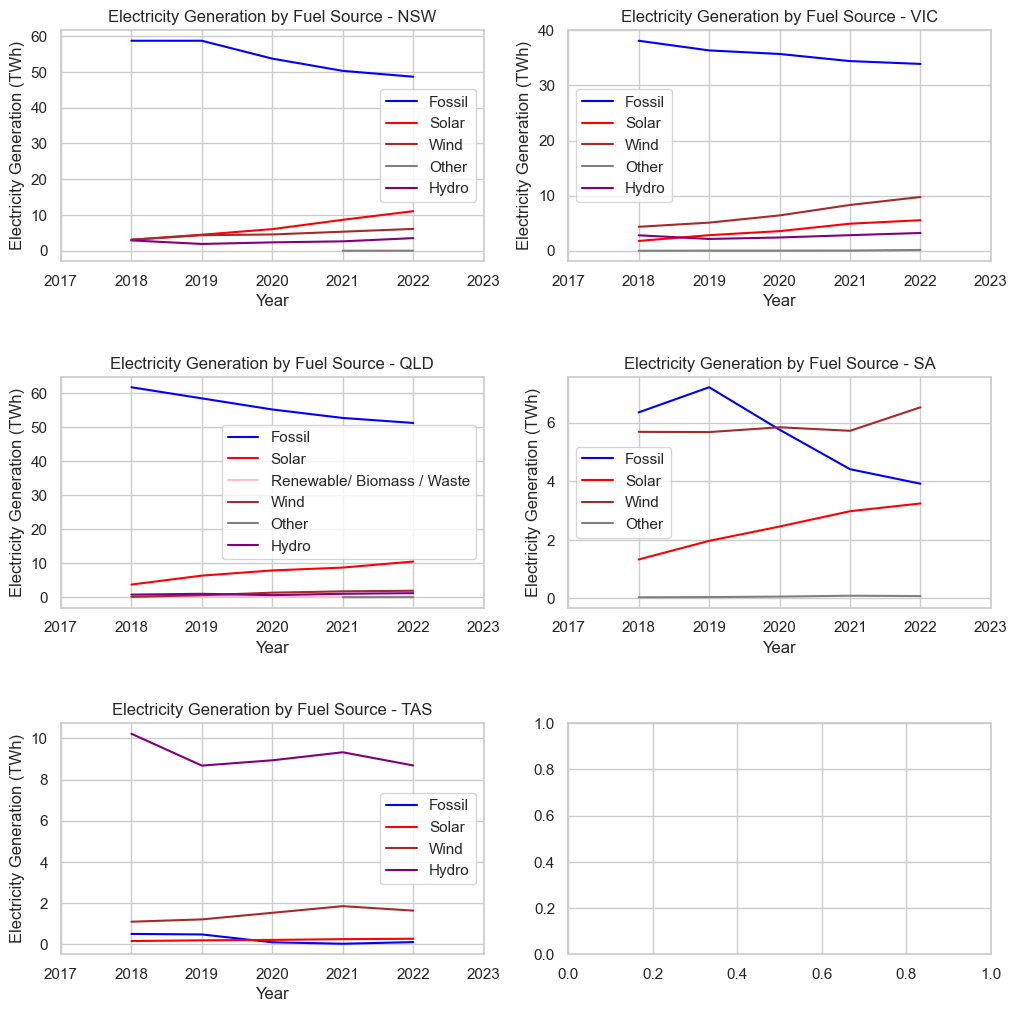

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for each region
regions = ['NSW', 'VIC', 'QLD', 'SA', 'TAS']

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Iterate over regions
for region, ax in zip(regions, axes.flatten()):
    # Filter data for the current region
    df_region = df_renewables_agg3[df_renewables_agg3['Year'].isin(range(2018, 2023)) & (df_renewables_agg3['Region'] == region)]

    # Create a pivot table
    pivot_table = df_region.pivot(index='Year', columns='Fuel Source', values='Electricity Generation (TWh)')

    # Set up the plot
    sns.set(style='whitegrid')

    # Create line graph
    fuel_sources = ['Fossil', 'Solar', 'Renewable/ Biomass / Waste', 'Wind', 'Other', 'Hydro']
    colors = ['blue', 'red', 'pink', 'brown', 'grey', 'purple']
    for fuel_source, color in zip(fuel_sources, colors):
        if fuel_source in pivot_table.columns:
            ax.plot(pivot_table.index, pivot_table[fuel_source], label=fuel_source, color=color)

    # Set axis labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Electricity Generation (TWh)')
    ax.set_title(f'Electricity Generation by Fuel Source - {region}')

    # Set x-axis range
    ax.set_xlim(2017, 2023)

    # Set legend
    ax.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


Renewable electricity generation - seasonality, 2018 - 2022

In [53]:
df_seasonality = pd.read_csv('2018_2022_Elec_Generation.csv')

# Convert the 'Electricity Generation (MWh)' column from MWh to TWh
df_seasonality['Electricity Generation (TWh)'] = df_renewables['Electricity Generation (MWh)'] / 1_000_000
df_seasonality

Year  Month Region      Fuel Source  Electricity Generation (MWh)  \
0     2018      1    NSW           Fossil                    5611235.42   
1     2018      1    NSW            Hydro                     255558.46   
2     2018      1    NSW            Solar                     257139.39   
3     2018      1    NSW             Wind                     151926.99   
4     2018      1    QLD           Fossil                    5644044.22   
...    ...    ...    ...              ...                           ...   
1324  2022     12    VIC  Battery storage                       7183.06   
1325  2022     12    VIC           Fossil                    2689215.99   
1326  2022     12    VIC            Hydro                     159101.66   
1327  2022     12    VIC            Solar                     754425.46   
1328  2022     12    VIC             Wind                     810635.81   

      Electricity Generation (TWh)  
0                         5.611235  
1                         0.255558  
2                         0.257139  
3                         0.151927  
4                         5.644044  
...                            ...  
1324                      0.007183  
1325                      2.689216  
1326                      0.159102  
1327                      0.754425  
1328                      0.810636  

[1329 rows x 6 columns]

In [54]:
print(df_seasonality.head())
print(df_seasonality.info())

   Year  Month Region Fuel Source  Electricity Generation (MWh)  \
0  2018      1    NSW      Fossil                    5611235.42   
1  2018      1    NSW       Hydro                     255558.46   
2  2018      1    NSW       Solar                     257139.39   
3  2018      1    NSW        Wind                     151926.99   
4  2018      1    QLD      Fossil                    5644044.22   

   Electricity Generation (TWh)  
0                      5.611235  
1                      0.255558  
2                      0.257139  
3                      0.151927  
4                      5.644044  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          1329 non-null   int64  
 1   Month                         1329 non-null   int64  
 2   Region                        1329 non-null   

Data Preparation: Convert the Year and Month columns to a datetime format and set them as the index of the DataFrame.

In [55]:
# Convert the 'Year' and 'Month' columns to datetime
df_seasonality['Year'] = pd.to_datetime(df_seasonality['Year'], format='%Y').dt.strftime('%Y')
df_seasonality['Month'] = pd.to_datetime(df_seasonality['Month'], format='%m').dt.strftime('%m')
df_seasonality

Year Month Region      Fuel Source  Electricity Generation (MWh)  \
0     2018    01    NSW           Fossil                    5611235.42   
1     2018    01    NSW            Hydro                     255558.46   
2     2018    01    NSW            Solar                     257139.39   
3     2018    01    NSW             Wind                     151926.99   
4     2018    01    QLD           Fossil                    5644044.22   
...    ...   ...    ...              ...                           ...   
1324  2022    12    VIC  Battery storage                       7183.06   
1325  2022    12    VIC           Fossil                    2689215.99   
1326  2022    12    VIC            Hydro                     159101.66   
1327  2022    12    VIC            Solar                     754425.46   
1328  2022    12    VIC             Wind                     810635.81   

      Electricity Generation (TWh)  
0                         5.611235  
1                         0.255558  
2                         0.257139  
3                         0.151927  
4                         5.644044  
...                            ...  
1324                      0.007183  
1325                      2.689216  
1326                      0.159102  
1327                      0.754425  
1328                      0.810636  

[1329 rows x 6 columns]

In [56]:
# Create a combined column for Year and Month
df_seasonality['Date'] = df_seasonality['Year'].astype(str) + '-' + df_seasonality['Month'].astype(str)
df_seasonality

Year Month Region      Fuel Source  Electricity Generation (MWh)  \
0     2018    01    NSW           Fossil                    5611235.42   
1     2018    01    NSW            Hydro                     255558.46   
2     2018    01    NSW            Solar                     257139.39   
3     2018    01    NSW             Wind                     151926.99   
4     2018    01    QLD           Fossil                    5644044.22   
...    ...   ...    ...              ...                           ...   
1324  2022    12    VIC  Battery storage                       7183.06   
1325  2022    12    VIC           Fossil                    2689215.99   
1326  2022    12    VIC            Hydro                     159101.66   
1327  2022    12    VIC            Solar                     754425.46   
1328  2022    12    VIC             Wind                     810635.81   

      Electricity Generation (TWh)     Date  
0                         5.611235  2018-01  
1                         0.255558  2018-01  
2                         0.257139  2018-01  
3                         0.151927  2018-01  
4                         5.644044  2018-01  
...                            ...      ...  
1324                      0.007183  2022-12  
1325                      2.689216  2022-12  
1326                      0.159102  2022-12  
1327                      0.754425  2022-12  
1328                      0.810636  2022-12  

[1329 rows x 7 columns]

In [57]:
df_seasonality.set_index('Date', inplace=True)
df_seasonality

Year Month Region      Fuel Source  Electricity Generation (MWh)  \
Date                                                                        
2018-01  2018    01    NSW           Fossil                    5611235.42   
2018-01  2018    01    NSW            Hydro                     255558.46   
2018-01  2018    01    NSW            Solar                     257139.39   
2018-01  2018    01    NSW             Wind                     151926.99   
2018-01  2018    01    QLD           Fossil                    5644044.22   
...       ...   ...    ...              ...                           ...   
2022-12  2022    12    VIC  Battery storage                       7183.06   
2022-12  2022    12    VIC           Fossil                    2689215.99   
2022-12  2022    12    VIC            Hydro                     159101.66   
2022-12  2022    12    VIC            Solar                     754425.46   
2022-12  2022    12    VIC             Wind                     810635.81   

         Electricity Generation (TWh)  
Date                                   
2018-01                      5.611235  
2018-01                      0.255558  
2018-01                      0.257139  
2018-01                      0.151927  
2018-01                      5.644044  
...                               ...  
2022-12                      0.007183  
2022-12                      2.689216  
2022-12                      0.159102  
2022-12                      0.754425  
2022-12                      0.810636  

[1329 rows x 6 columns]

Seasonality - Electricity Generation by all sources

In [58]:
df_seasonality_all = df_seasonality.groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_all.set_index('Date', inplace=True)
df_seasonality_all.head()

Electricity Generation (TWh)
Date                                 
2018-01                     18.500215
2018-02                     16.389674
2018-03                     17.204044
2018-04                     16.140354
2018-05                     17.209088

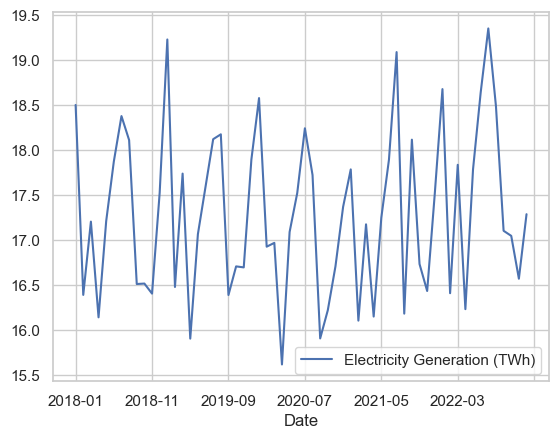

In [59]:
df_seasonality_all.plot();

<Figure size 640x480 with 0 Axes>

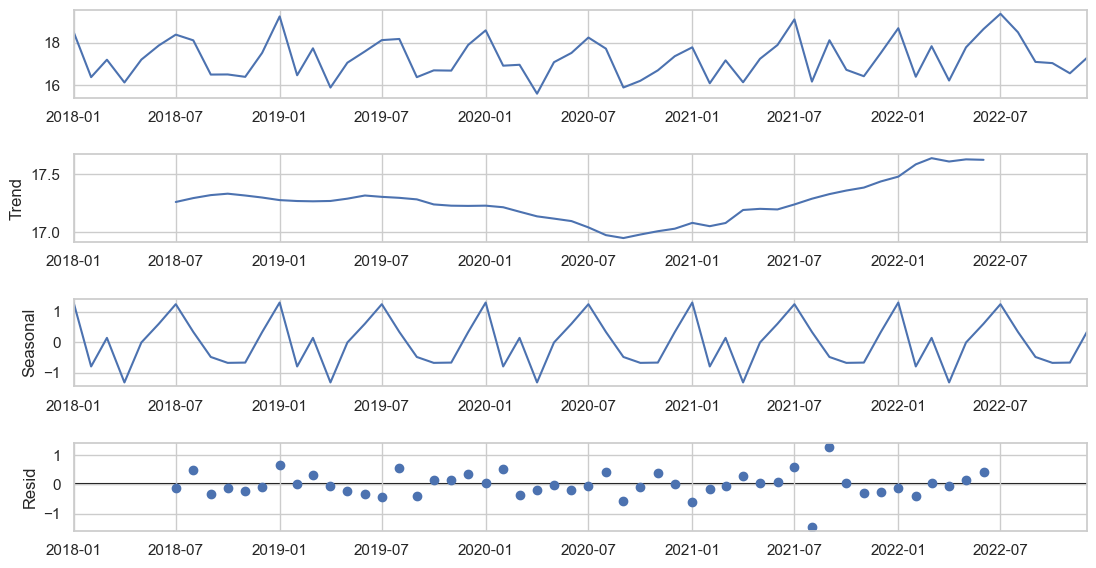

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_seasonality_all.index = pd.to_datetime(df_seasonality_all.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_all, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

Seasonality - Electricity Generation by Fossil

In [61]:
df_seasonality_fossil = df_seasonality[df_seasonality['Fuel Source'] == 'Fossil'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_fossil.set_index('Date', inplace=True)
df_seasonality_fossil.head()

Electricity Generation (TWh)
Date                                 
2018-01                     15.538247
2018-02                     13.735349
2018-03                     14.218771
2018-04                     13.215767
2018-05                     13.924181

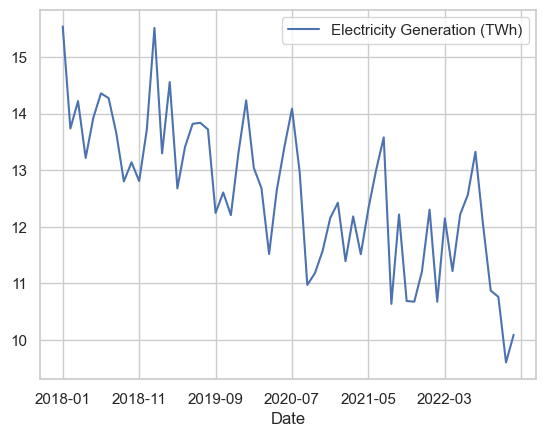

In [62]:
df_seasonality_fossil.plot();

<Figure size 640x480 with 0 Axes>

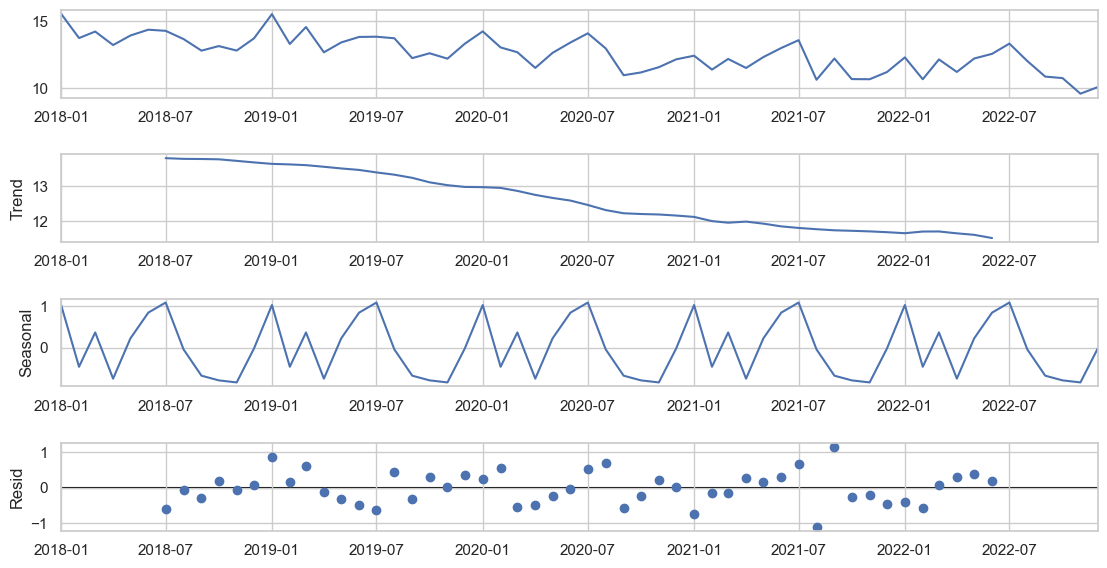

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_seasonality_fossil.index = pd.to_datetime(df_seasonality_fossil.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_fossil, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

Seasonality - Electricity Generation by all renewables

In [64]:
renewable_sources = ['Wind', 'Solar', 'Hydro', 'Renewable/ Biomass / Waste']
df_seasonality_renewables = df_seasonality[df_seasonality['Fuel Source'].isin(renewable_sources)].copy()
df_seasonality_renewables.loc[df_seasonality_renewables['Fuel Source'].isin(renewable_sources), 'Fuel Source'] = 'Renewables generation'
df_seasonality_renewables = df_seasonality_renewables.groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_renewables.set_index('Date', inplace=True)
df_seasonality_renewables.head()

Electricity Generation (TWh)
Date                                 
2018-01                      2.959041
2018-02                      2.650900
2018-03                      2.982692
2018-04                      2.921265
2018-05                      3.280723

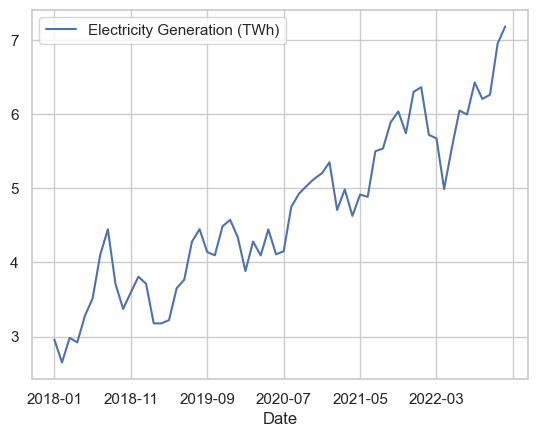

In [65]:
df_seasonality_renewables.plot();

<Figure size 640x480 with 0 Axes>

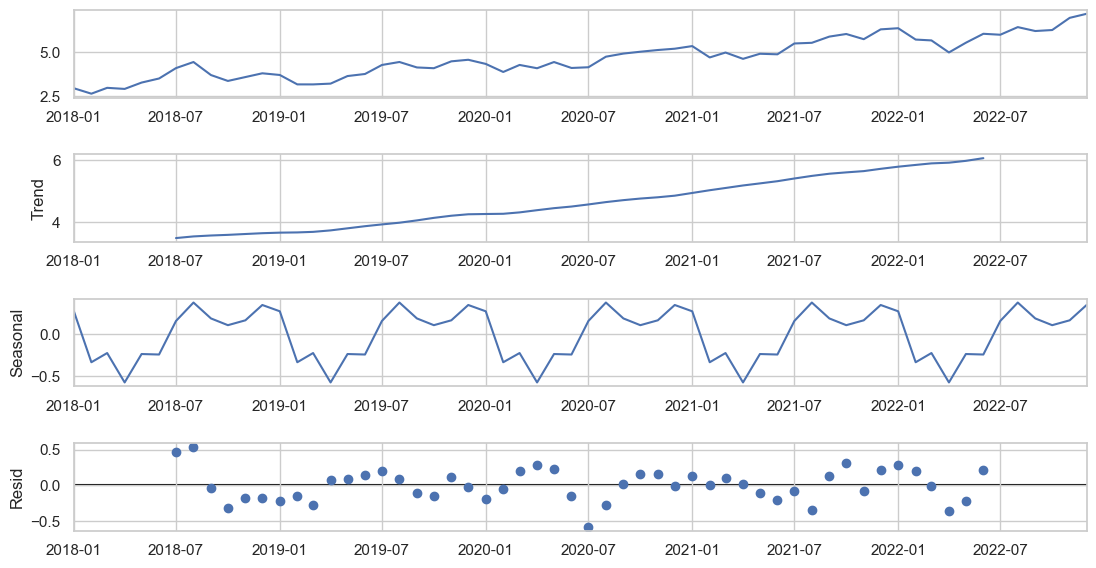

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_seasonality_renewables.index = pd.to_datetime(df_seasonality_renewables.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_renewables, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

Seasonality - Electricity Generation by Wind 

In [67]:
df_seasonality_wind = df_seasonality[df_seasonality['Fuel Source'] == 'Wind'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_wind.set_index('Date', inplace=True)
df_seasonality_wind.head()

Electricity Generation (TWh)
Date                                 
2018-01                      0.978343
2018-02                      0.963773
2018-03                      1.132908
2018-04                      0.873159
2018-05                      1.215376

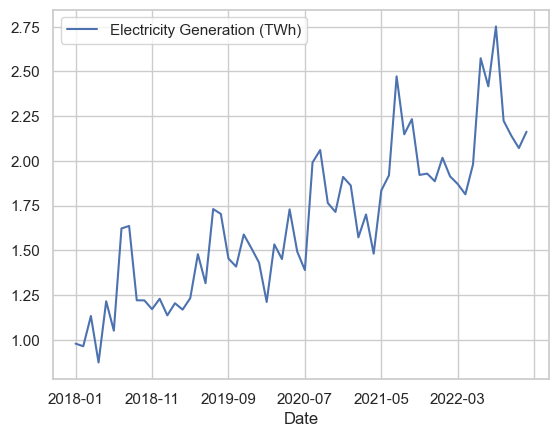

In [68]:
df_seasonality_wind.plot();

<Figure size 640x480 with 0 Axes>

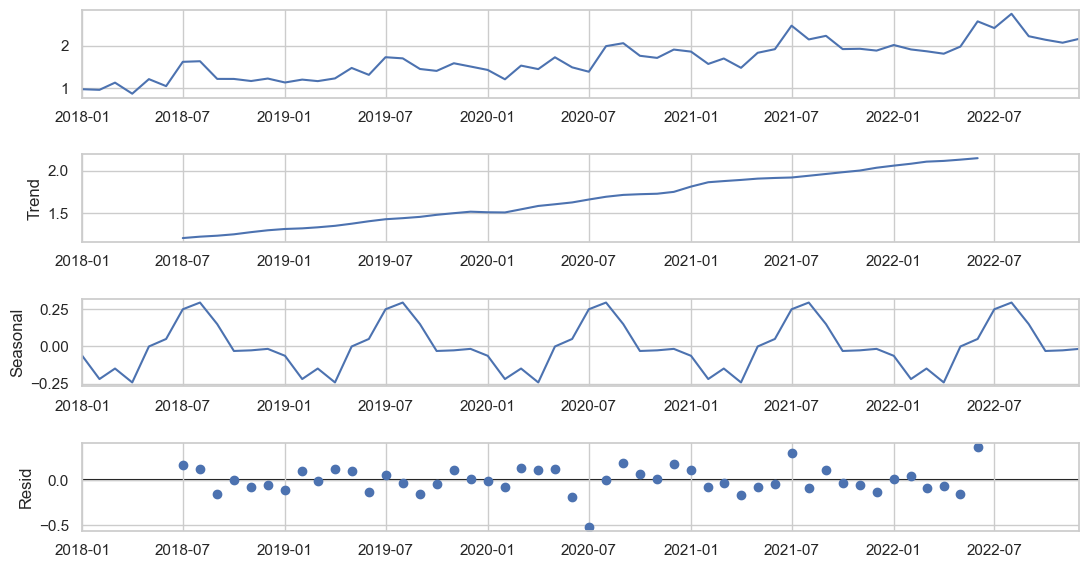

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decomposition = seasonal_decompose(df_seasonality_wind)

df_seasonality_wind.index = pd.to_datetime(df_seasonality_wind.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_wind, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

Seasonality - Electricity Generation by Solar

In [70]:
df_seasonality_solar = df_seasonality[df_seasonality['Fuel Source'] == 'Solar'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_solar.set_index('Date', inplace=True)
df_seasonality_solar.head()

Electricity Generation (TWh)
Date                                 
2018-01                      0.870123
2018-02                      0.733679
2018-03                      0.731920
2018-04                      0.640313
2018-05                      0.552856

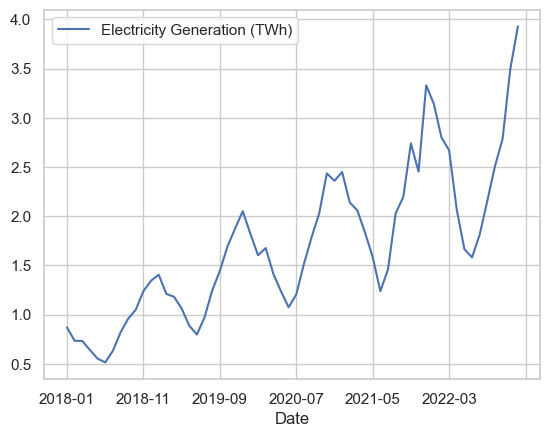

In [71]:
df_seasonality_solar.plot();

<Figure size 640x480 with 0 Axes>

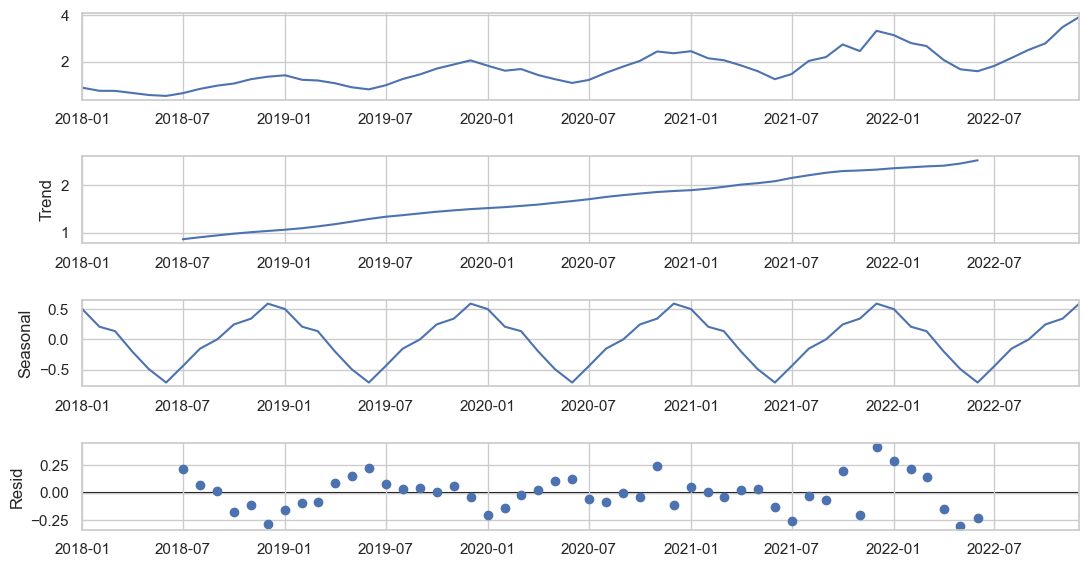

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_seasonality_solar.index = pd.to_datetime(df_seasonality_solar.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_solar, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

Seasonality - Electricity Generation by Hydro

In [73]:
df_seasonality_hydro = df_seasonality[df_seasonality['Fuel Source'] == 'Hydro'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_hydro.set_index('Date', inplace=True)
df_seasonality_hydro.head()

Electricity Generation (TWh)
Date                                 
2018-01                      1.089034
2018-02                      0.937228
2018-03                      1.115599
2018-04                      1.403336
2018-05                      1.510192

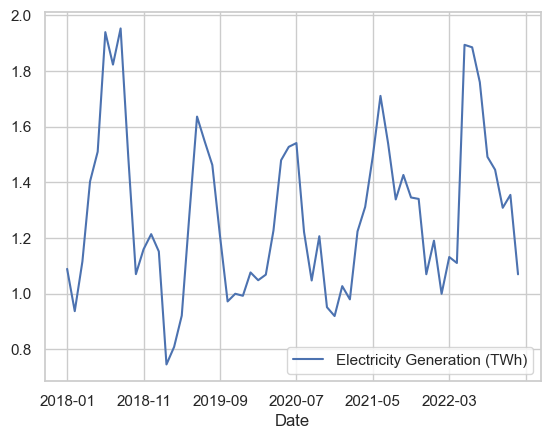

In [74]:
df_seasonality_hydro.plot();

<Figure size 640x480 with 0 Axes>

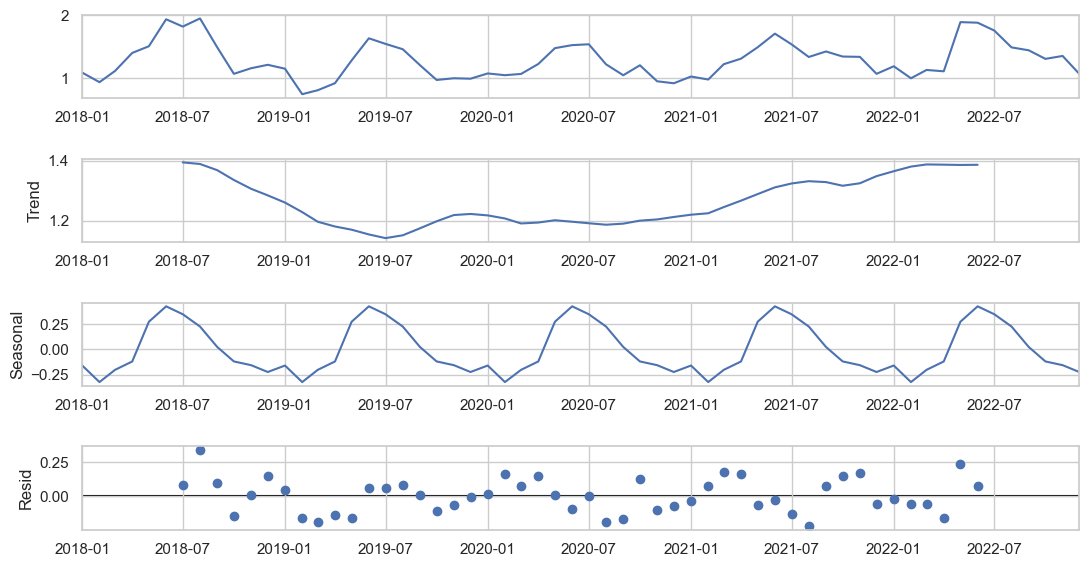

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_seasonality_hydro.index = pd.to_datetime(df_seasonality_hydro.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_hydro, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

Seasonality - Electricity Generation by Renewable/ Biomass / Waste

In [76]:
df_seasonality_rbw = df_seasonality[df_seasonality['Fuel Source'] == 'Renewable/ Biomass / Waste'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()
df_seasonality_rbw.set_index('Date', inplace=True)
df_seasonality_rbw.head()

Electricity Generation (TWh)
Date                                 
2018-01                      0.021541
2018-02                      0.016220
2018-03                      0.002264
2018-04                      0.004456
2018-05                      0.002299

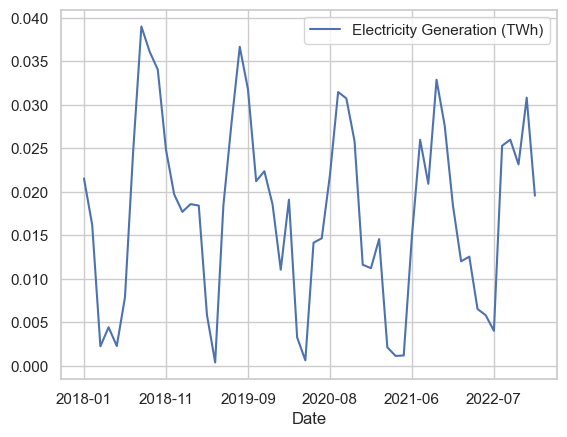

In [77]:
df_seasonality_rbw.plot();

<Figure size 640x480 with 0 Axes>

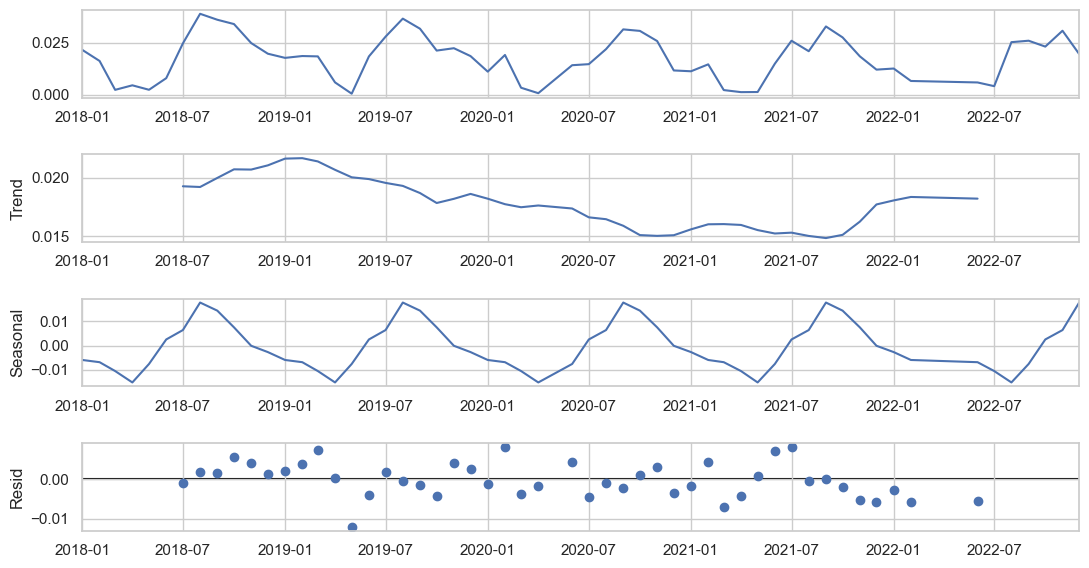

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_seasonality_rbw.index = pd.to_datetime(df_seasonality_rbw.index)  # Convert index to datetime if not already

decomposition = seasonal_decompose(df_seasonality_rbw, period=12)  # Set the period to 12 for monthly data

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

In [79]:
!pip install pmdarima

Train-test split: Solar & find the best SARIMA parameters

In [82]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df_seasonality_solar.index.freq = 'MS'

# Split the data into training and testing sets
train_solar, test_solar = train_test_split(df_seasonality_solar, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_solar, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_solar)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_solar))

# Evaluate the model performance
mse = mean_squared_error(test_solar, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-0.276, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1.956, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-17.119, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-18.536, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-16.897, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-16.536, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-16.536, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=-14.537, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=-16.538, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.993 seconds
Best SARIMA parameters:
Order: (1, 1, 0)
Seasonal Order: (0, 1, 0, 12)
Mean Squared Error: 0.161845179

Introduce SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.28485D-01    |proj g|=  1.18591D-01

At iterate    5    f= -2.28665D-01    |proj g|=  3.93956D-02

At iterate   10    f= -2.31797D-01    |proj g|=  5.38450D-01

At iterate   15    f= -2.34753D-01    |proj g|=  2.46913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     25      1     0     0   2.469D-04  -2.348D-01
  F = -0.23475274745072441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


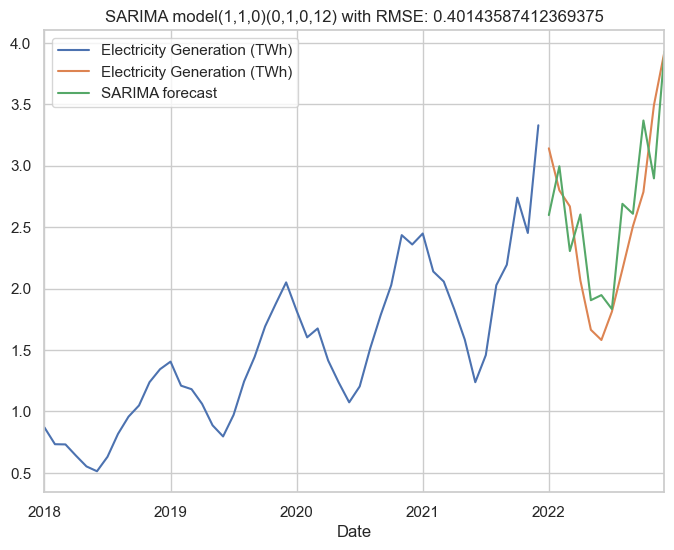

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_model = SARIMAX(train_solar, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_solar.plot(ax = ax, label='train')
test_solar.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_solar,y_pred_seasonal))
ax.set_title(f'SARIMA model(1,1,0)(0,1,0,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.28485D-01    |proj g|=  1.18591D-01

At iterate    5    f= -2.28665D-01    |proj g|=  3.93956D-02

At iterate   10    f= -2.31797D-01    |proj g|=  5.38450D-01

At iterate   15    f= -2.34753D-01    |proj g|=  2.46913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     25      1     0     0   2.469D-04  -2.348D-01
  F = -0.23475274745072441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


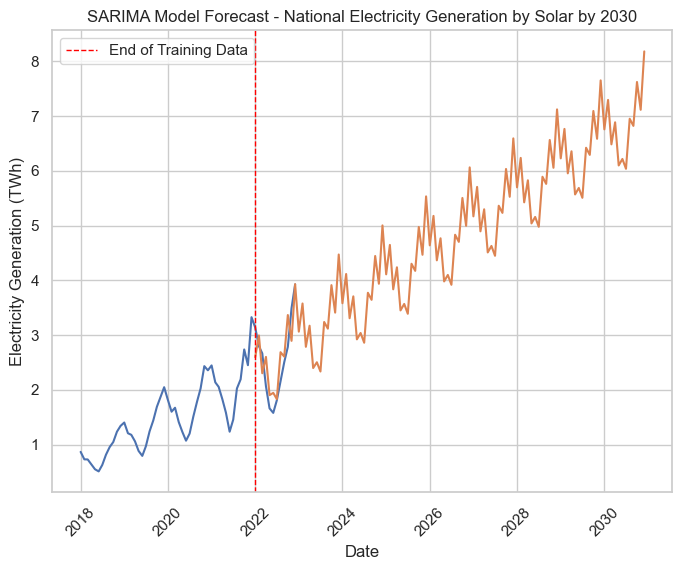

In [85]:
seasonal_model = SARIMAX(train_solar, order=(1,1,0), seasonal_order=(0,1,0,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_solar = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_solar, test_solar, predicted_solar], axis=0)
combined_data.to_csv('SARIMA_solar.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_solar.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by Solar by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Train-test split: Wind & find the best SARIMA parameters

In [86]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
df_seasonality_wind.index.freq = 'MS'

# Split the data into training and testing sets
train_wind, test_wind = train_test_split(df_seasonality_wind, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_wind, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_wind)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_wind))

# Evaluate the model performance
mse = mean_squared_error(test_wind, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=15.344, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8.209, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=14.312, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5.292, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=7.239, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7.735, Time=0.10 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3.053, Time=0.25 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=6.076, Time=0.10 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=5.043, Time=0.30 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1.563, Time=0.29 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4.165, Time=0.11 sec
 AR

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 0.05243253842464743


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Introduce SARIMA model

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43386D-02    |proj g|=  8.51727D-01

At iterate    5    f= -1.19163D-01    |proj g|=  5.29227D-01

At iterate   10    f= -1.66869D-01    |proj g|=  5.32936D-02

At iterate   15    f= -1.67658D-01    |proj g|=  2.14144D-02

At iterate   20    f= -1.67736D-01    |proj g|=  8.31511D-03

At iterate   25    f= -1.67752D-01    |proj g|=  6.63684D-03

At iterate   30    f= -1.77303D-01    |proj g|=  2.50795D-01

At iterate   35    f= -1.88820D-01    |proj g|=  1.10528D-01

At iterate   40    f= -1.89358D-01    |proj g|=  1.22555D-02

At iterate   45    f= -1.89402D-01    |proj g|=  1.27810D-03

At iterate   50    f= -1.91515D-01    |proj g|=  8.90050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


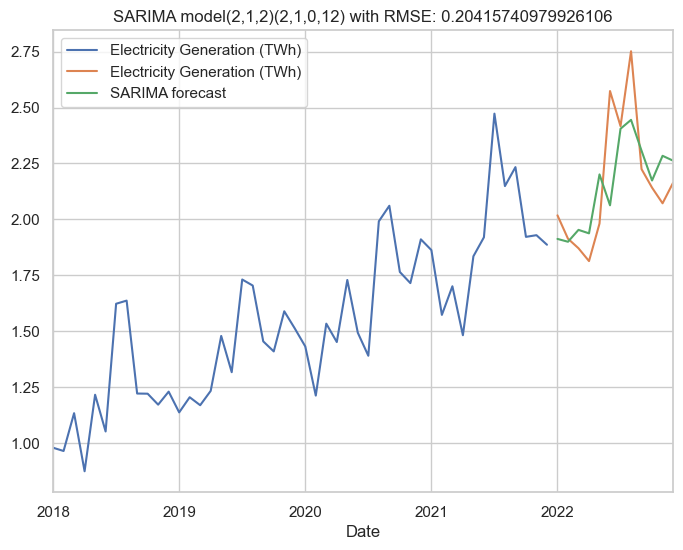

In [91]:
seasonal_model = SARIMAX(train_wind, order=(2, 1, 2), seasonal_order=(2, 1, 0, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_wind.plot(ax = ax, label='train')
test_wind.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_wind,y_pred_seasonal))
ax.set_title(f'SARIMA model(2,1,2)(2,1,0,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA model

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43386D-02    |proj g|=  8.51727D-01

At iterate    5    f= -1.19163D-01    |proj g|=  5.29227D-01

At iterate   10    f= -1.66869D-01    |proj g|=  5.32936D-02

At iterate   15    f= -1.67658D-01    |proj g|=  2.14144D-02

At iterate   20    f= -1.67736D-01    |proj g|=  8.31511D-03

At iterate   25    f= -1.67752D-01    |proj g|=  6.63684D-03

At iterate   30    f= -1.77303D-01    |proj g|=  2.50795D-01

At iterate   35    f= -1.88820D-01    |proj g|=  1.10528D-01

At iterate   40    f= -1.89358D-01    |proj g|=  1.22555D-02

At iterate   45    f= -1.89402D-01    |proj g|=  1.27810D-03


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.91515D-01    |proj g|=  8.90050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   8.900D-02  -1.915D-01
  F = -0.19151533582593269     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


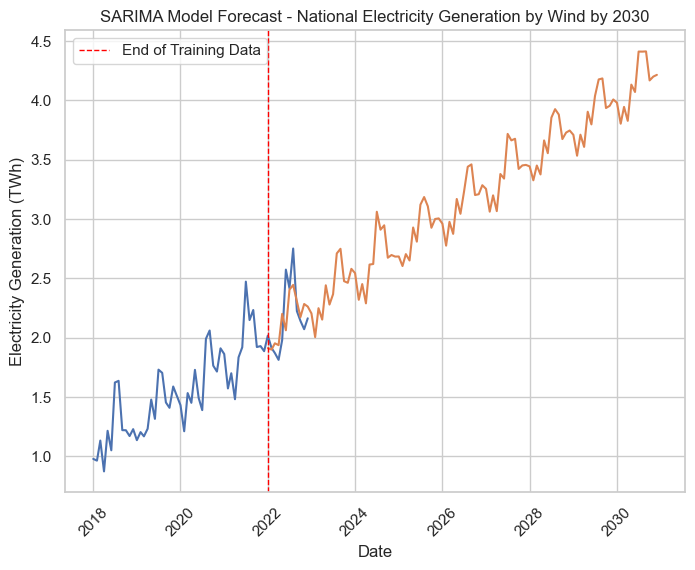

In [92]:
# Assuming you have already trained and obtained the SARIMA model
seasonal_model = SARIMAX(train_wind, order=(2,1,2), seasonal_order=(2,1,0,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_wind = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_wind, test_wind, predicted_wind], axis=0)
combined_data.to_csv('SARIMA_wind.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_wind.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by Wind by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
Train-test split: Hydro & find the best SARIMA parameters

In [93]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
df_seasonality_hydro.index.freq = 'MS'

# Split the data into training and testing sets
train_hydro, test_hydro = train_test_split(df_seasonality_hydro, train_size=0.8)
l
# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_hydro, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_hydro)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_hydro))

# Evaluate the model performance
mse = mean_squared_error(test_hydro, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-13.704, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-14.544, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-13.955, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-14.863, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-16.500, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-14.816, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-15.478, Time=0.06 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-14.796, Time=0.04 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-15.672, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=-13.381, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=-14.709, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.827 seconds
Best SARIMA parameters:
Order: (0, 1, 1)
Seasonal Order: (0, 1, 0, 12)
Mean Squared Error: 

Introduce SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.12964D-01    |proj g|=  1.82382D-01

At iterate    5    f= -2.13424D-01    |proj g|=  6.16621D-02

At iterate   10    f= -2.13539D-01    |proj g|=  4.35365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   5.072D-05  -2.135D-01
  F = -0.21353864826654670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


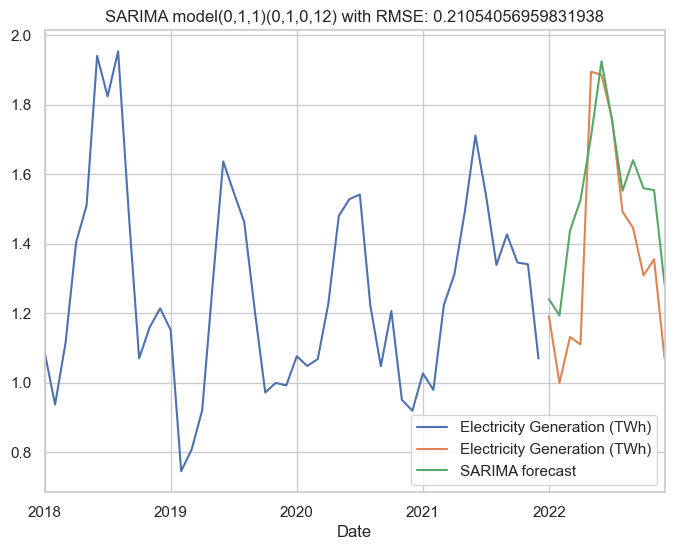

In [94]:
seasonal_model = SARIMAX(train_hydro, order=(0, 1, 1), seasonal_order=(0, 1, 0, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_hydro.plot(ax = ax, label='train')
test_hydro.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_hydro,y_pred_seasonal))
ax.set_title(f'SARIMA model(0,1,1)(0,1,0,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.12964D-01    |proj g|=  1.82382D-01

At iterate    5    f= -2.13424D-01    |proj g|=  6.16621D-02

At iterate   10    f= -2.13539D-01    |proj g|=  4.35365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   5.072D-05  -2.135D-01
  F = -0.21353864826654670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


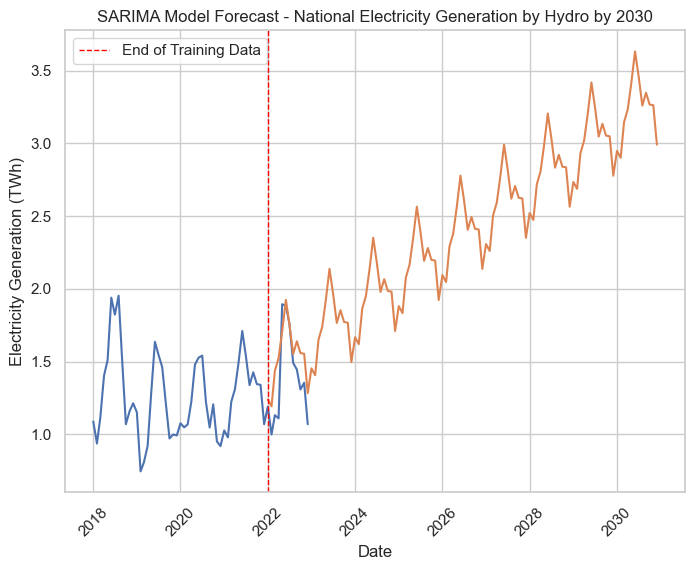

In [95]:
# Assuming you have already trained and obtained the SARIMA model
seasonal_model = SARIMAX(train_hydro, order=(0,1,1), seasonal_order=(0,1,0,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_hydro = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_hydro, test_hydro, predicted_hydro], axis=0)
combined_data.to_csv('SARIMA_hydro.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_hydro.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by Hydro by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Train-test split: Renewable/ Biomass / Waste & find the best SARIMA parameters

In [96]:
df_seasonality_rbw.index = pd.to_datetime(df_seasonality_rbw.index)
df_seasonality_rbw.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.021541
2018-02-01                      0.016220
2018-03-01                      0.002264
2018-04-01                      0.004456
2018-05-01                      0.002299

In [97]:
# Convert the index to datetime and set the frequency
df_seasonality_rbw.index = pd.to_datetime(df_seasonality_rbw.index)
df_seasonality_rbw.index = pd.date_range(start=df_seasonality_rbw.index[0], periods=len(df_seasonality_rbw), freq='MS')

# Split the data into training and testing sets
train_rbw, test_rbw = train_test_split(df_seasonality_rbw, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_rbw, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_rbw)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_rbw))

# Evaluate the model performance
mse = mean_squared_error(test_rbw, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-199.924, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-193.560, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-200.369, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-207.436, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-207.731, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-207.986, Time=0.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-205.493, Time=0.55 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-205.318, Time=0.36 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-203.333, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-200.375, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-206.395, Time=0.30 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=-209.803, Time=0.34 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-203.093, Time=0.03 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=-207.285, Time=0.65 sec
 ARIMA(0,1,2)(1,1,1

Introduce SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36705D+00    |proj g|=  4.09491D+01

At iterate    5    f= -2.45695D+00    |proj g|=  6.75299D-02

At iterate   10    f= -2.46234D+00    |proj g|=  1.12302D+01

At iterate   15    f= -2.47465D+00    |proj g|=  9.81444D-02

At iterate   20    f= -2.47502D+00    |proj g|=  2.52452D-01

At iterate   25    f= -2.47503D+00    |proj g|=  2.15539D-01
  ys=-9.337E-12  -gs= 4.667E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


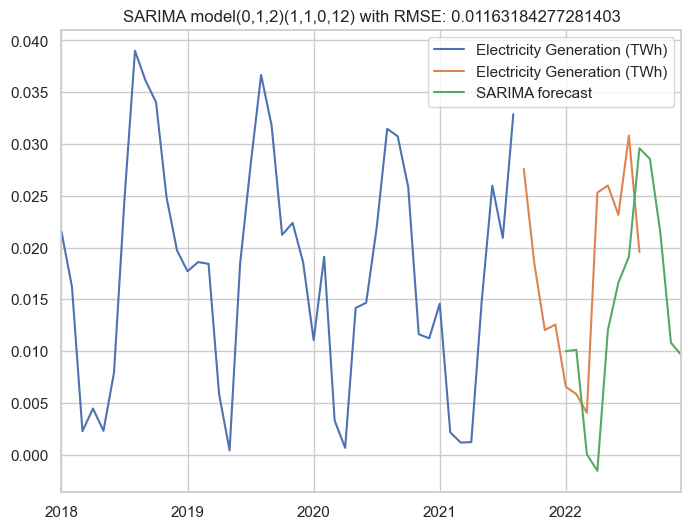

In [98]:
seasonal_model = SARIMAX(train_rbw, order=(0, 1, 2), seasonal_order=(1, 1, 0, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_rbw.plot(ax = ax, label='train')
test_rbw.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_rbw,y_pred_seasonal))
ax.set_title(f'SARIMA model(0,1,2)(1,1,0,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36705D+00    |proj g|=  4.09491D+01

At iterate    5    f= -2.45695D+00    |proj g|=  6.75299D-02

At iterate   10    f= -2.46234D+00    |proj g|=  1.12302D+01

At iterate   15    f= -2.47465D+00    |proj g|=  9.81444D-02

At iterate   20    f= -2.47502D+00    |proj g|=  2.52452D-01

At iterate   25    f= -2.47503D+00    |proj g|=  2.15539D-01
  ys=-9.337E-12  -gs= 4.667E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


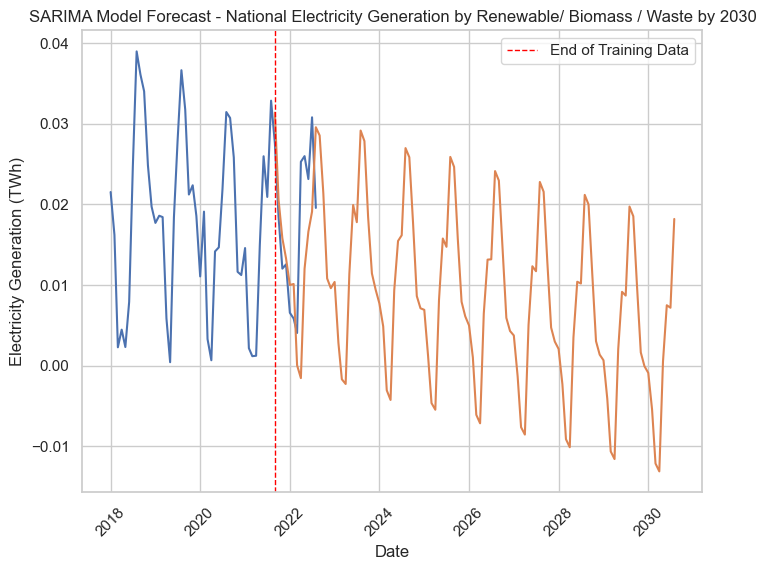

In [100]:
# Assuming you have already trained and obtained the SARIMA model
seasonal_model = SARIMAX(train_rbw, order=(0,1,2), seasonal_order=(1,1,0,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_rbw = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_rbw, test_rbw, predicted_rbw], axis=0)
combined_data.to_csv('SARIMA_rbw.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_rbw.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by Renewable/ Biomass / Waste by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Train-test split: Renewables & find the best SARIMA parameters

In [101]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
df_seasonality_renewables.index.freq = 'MS'

# Split the data into training and testing sets
train_renewables, test_renewables = train_test_split(df_seasonality_renewables, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_renewables, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_renewables)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_renewables))

# Evaluate the model performance
mse = mean_squared_error(test_renewables, y_pred)
print("Mean Squared Error:", mse)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=17.593, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=16.773, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=19.548, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=19.516, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=17.572, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=19.572, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=18.737, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=18.666, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=15.210, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=16.651, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=16.677, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=18.638, Time=0.19 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=14.931, Time=0.09 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=16.651, Time=0.33 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=16.6

Introduce SARIMA model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70115D-02    |proj g|=  4.14486D-01

At iterate    5    f=  7.01216D-02    |proj g|=  1.47916D-01

At iterate   10    f=  6.72053D-02    |proj g|=  1.46646D-01

At iterate   15    f=  6.60546D-02    |proj g|=  1.17601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   1.789D-05   6.605D-02
  F =   6.6054558199490868E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


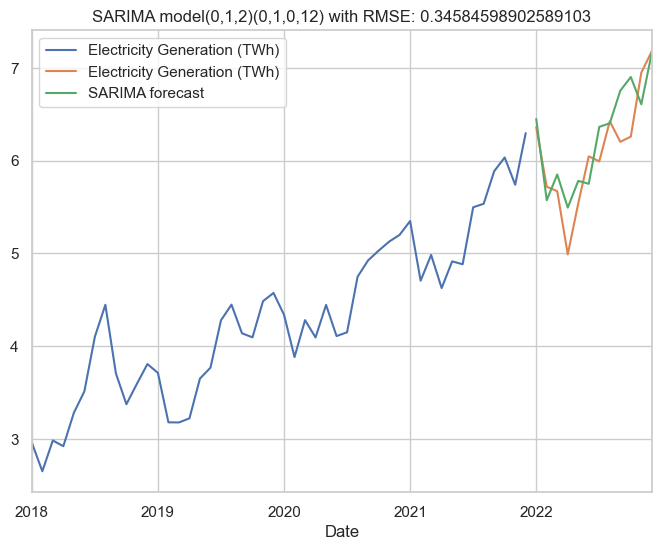

In [102]:
seasonal_model = SARIMAX(train_renewables, order=(0, 1, 2), seasonal_order=(0, 1, 0, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_renewables.plot(ax = ax, label='train')
test_renewables.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_renewables,y_pred_seasonal))
ax.set_title(f'SARIMA model(0,1,2)(0,1,0,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70115D-02    |proj g|=  4.14486D-01

At iterate    5    f=  7.01216D-02    |proj g|=  1.47916D-01

At iterate   10    f=  6.72053D-02    |proj g|=  1.46646D-01

At iterate   15    f=  6.60546D-02    |proj g|=  1.17601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   1.789D-05   6.605D-02
  F =   6.6054558199490868E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


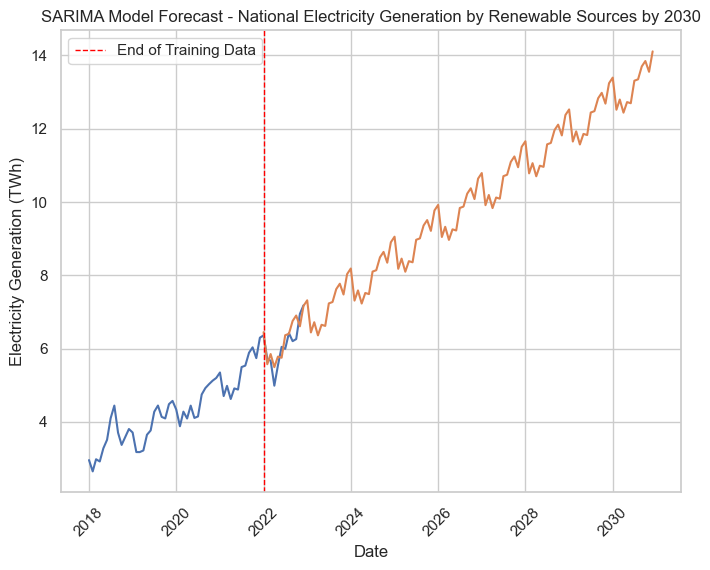

In [294]:
# Assuming you have already trained and obtained the SARIMA model
seasonal_model = SARIMAX(train_renewables, order=(0,1,2), seasonal_order=(0,1,0,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_renewables = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_renewables, test_renewables, predicted_renewables], axis=0)
combined_data.to_csv('SARIMA_renewables.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_renewables.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by Renewable Sources by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Train-test split: Fossil & find the best SARIMA parameters

In [104]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
df_seasonality_fossil.index.freq = 'MS'

# Split the data into training and testing sets
train_fossil, test_fossil = train_test_split(df_seasonality_fossil, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_fossil, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_fossil)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_fossil))

# Evaluate the model performance
mse = mean_squared_error(test_fossil, y_pred)
print("Mean Squared Error:", mse)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=98.381, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=97.647, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=88.770, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=79.397, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=79.424, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=80.114, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=82.671, Time=0.33 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=81.361, Time=0.13 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=81.368, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=87.116, Time=0.07 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=83.167, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fi

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Squared Error: 0.6917323604794934


Introduce SARIMA model

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10579D-01    |proj g|=  1.45471D-01

At iterate    5    f=  7.68544D-01    |proj g|=  1.51355D-02

At iterate   10    f=  7.64593D-01    |proj g|=  5.35906D-03

At iterate   15    f=  7.64552D-01    |proj g|=  1.03843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.038D-05   7.646D-01
  F =  0.76455170694715768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


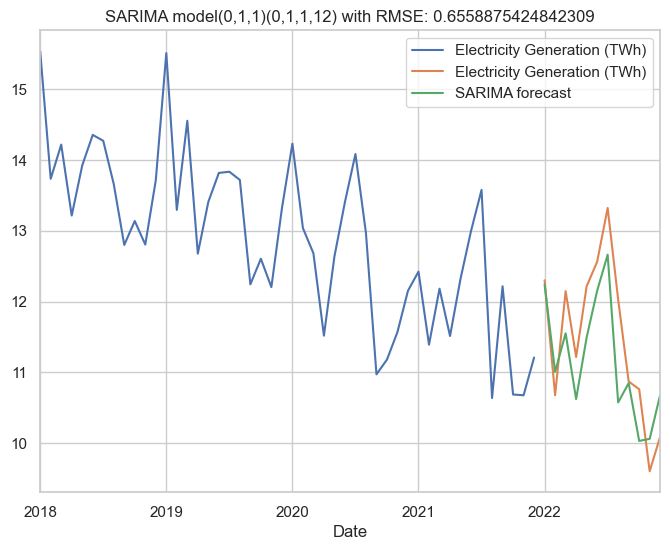

In [105]:
seasonal_model = SARIMAX(train_fossil, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_fossil.plot(ax = ax, label='train')
test_fossil.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_fossil,y_pred_seasonal))
ax.set_title(f'SARIMA model(0,1,1)(0,1,1,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA model

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10579D-01    |proj g|=  1.45471D-01

At iterate    5    f=  7.68544D-01    |proj g|=  1.51355D-02

At iterate   10    f=  7.64593D-01    |proj g|=  5.35906D-03

At iterate   15    f=  7.64552D-01    |proj g|=  1.03843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.038D-05   7.646D-01
  F =  0.76455170694715768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


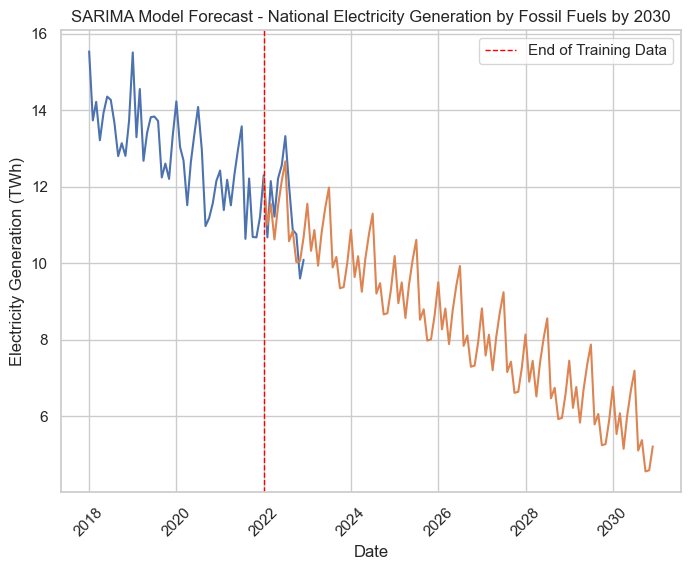

In [106]:
# Assuming you have already trained and obtained the SARIMA model
seasonal_model = SARIMAX(train_fossil, order=(0,1,1), seasonal_order=(0,1,1,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 108 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_fossil = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_fossil, test_fossil, predicted_fossil], axis=0)
combined_data.to_csv('SARIMA_fossil.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_fossil.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by Fossil Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Train-test split: All sources & find the best SARIMA parameters

In [107]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
df_seasonality_all.index.freq = 'MS'

# Split the data into training and testing sets
train_all, test_all = train_test_split(df_seasonality_all, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_all, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_all)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_all))

# Evaluate the model performance
mse = mean_squared_error(test_all, y_pred)
print("Mean Squared Error:", mse)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=99.259, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=97.671, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=84.738, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=83.395, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=84.349, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=77.785, Time=0.03 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=79.292, Time=0.05 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=78.868, Time=0.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=78.022, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=76.565, Time=0.05 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=77.439, Time=0.14 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=76.073, Time=

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Squared Error: 0.21496299879434633


Introduce SARIMA model

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29044D-01    |proj g|=  1.76448D-01

At iterate    5    f=  6.95896D-01    |proj g|=  7.41817D-02

At iterate   10    f=  6.91325D-01    |proj g|=  2.67650D-02

At iterate   15    f=  6.89950D-01    |proj g|=  1.60831D-02

At iterate   20    f=  6.89230D-01    |proj g|=  1.22938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     35      1     0     0   8.670D-06   6.892D-01
  F =  0.68922904591130940     

CONVERG

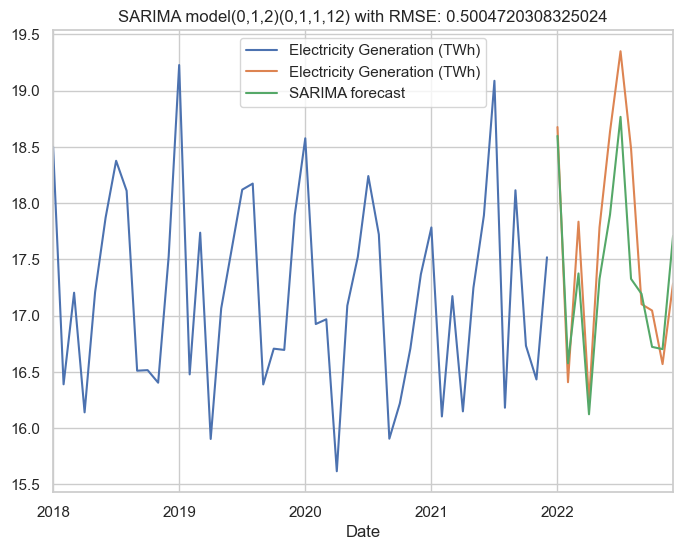

In [108]:
seasonal_model = SARIMAX(train_all, order=(0, 1, 2), seasonal_order=(0, 1, 1, 12)).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_all.plot(ax = ax, label='train')
test_all.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_all,y_pred_seasonal))
ax.set_title(f'SARIMA model(0,1,2)(0,1,1,12) with RMSE: {rsme}')

plt.show()

Apply SARIMA Model

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29044D-01    |proj g|=  1.76448D-01

At iterate    5    f=  6.95896D-01    |proj g|=  7.41817D-02

At iterate   10    f=  6.91325D-01    |proj g|=  2.67650D-02

At iterate   15    f=  6.89950D-01    |proj g|=  1.60831D-02

At iterate   20    f=  6.89230D-01    |proj g|=  1.22938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     35      1     0     0   8.670D-06   6.892D-01
  F =  0.68922904591130940     

CONVERG

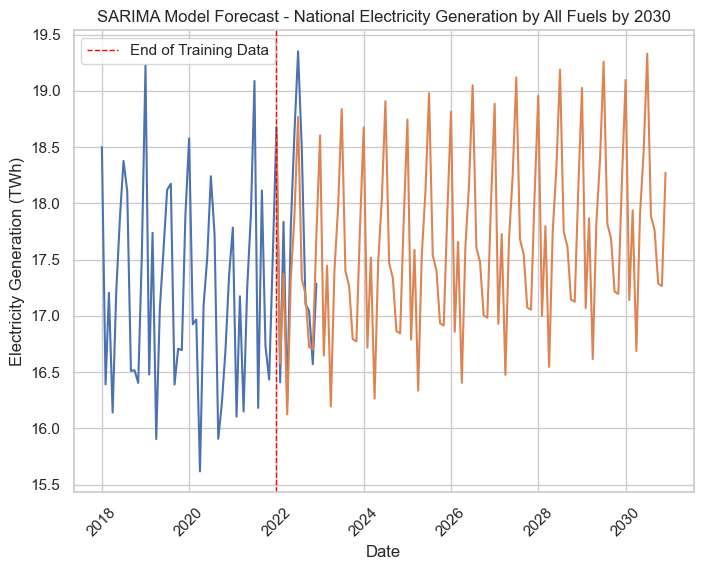

In [295]:
seasonal_model = SARIMAX(train_all, order=(0,1,2), seasonal_order=(0,1,1,12)).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 108 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_all = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_all, test_all, predicted_all], axis=0)
combined_data.to_csv('SARIMA_all.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_all.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - National Electricity Generation by All Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [196]:
df_seasonality

Year Month Region      Fuel Source  Electricity Generation (MWh)  \
Date                                                                        
2018-01  2018    01    NSW           Fossil                    5611235.42   
2018-01  2018    01    NSW            Hydro                     255558.46   
2018-01  2018    01    NSW            Solar                     257139.39   
2018-01  2018    01    NSW             Wind                     151926.99   
2018-01  2018    01    QLD           Fossil                    5644044.22   
...       ...   ...    ...              ...                           ...   
2022-12  2022    12    VIC  Battery storage                       7183.06   
2022-12  2022    12    VIC           Fossil                    2689215.99   
2022-12  2022    12    VIC            Hydro                     159101.66   
2022-12  2022    12    VIC            Solar                     754425.46   
2022-12  2022    12    VIC             Wind                     810635.81   

         Electricity Generation (TWh)  
Date                                   
2018-01                      5.611235  
2018-01                      0.255558  
2018-01                      0.257139  
2018-01                      0.151927  
2018-01                      5.644044  
...                               ...  
2022-12                      0.007183  
2022-12                      2.689216  
2022-12                      0.159102  
2022-12                      0.754425  
2022-12                      0.810636  

[1329 rows x 6 columns]

State Prediction - NSW

In [204]:
df_nswa = df_seasonality[df_seasonality['Region'] == 'NSW'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_nswa.set_index('Date', inplace=True)
df_nswa.index = pd.to_datetime(df_nswa.index)  # Convert index to datetime if not already

df_nswa.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      6.275860
2018-02-01                      5.561177
2018-03-01                      5.771733
2018-04-01                      5.020461
2018-05-01                      5.440601

In [206]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df_nswa.index.freq = 'MS'

# Split the data into training and testing sets
train_nswa, test_nswa = train_test_split(df_nswa, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_nswa, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_nswa)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_nswa))

# Evaluate the model performance
mse = mean_squared_error(test_nswa, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=45.075, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=45.476, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=43.371, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=34.435, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=34.403, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=35.375, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=35.891, Time=0.06 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=35.728, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=42.522, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=36.350, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.914 seconds
Best SARIMA parameters:
Order: (0, 1, 1)
Seasonal Order: (0, 1, 0, 12)
Mean Squared Error: 0.160582010769

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39755D-01    |proj g|=  2.42300D-01

At iterate    5    f=  3.17420D-01    |proj g|=  4.79504D-02

At iterate   10    f=  3.16698D-01    |proj g|=  3.01928D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     28      1     0     0   3.019D-05   3.167D-01
  F =  0.31669756572541136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


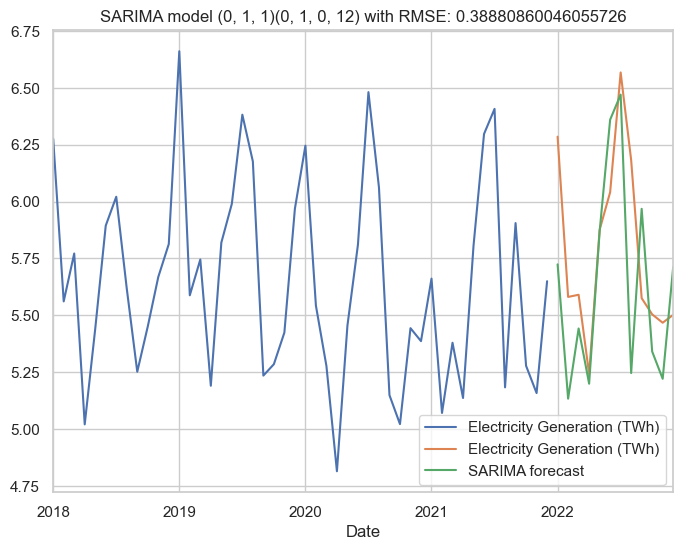

In [209]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_model = SARIMAX(train_nswa, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_nswa.plot(ax = ax, label='train')
test_nswa.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_nswa,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39755D-01    |proj g|=  2.42300D-01

At iterate    5    f=  3.17420D-01    |proj g|=  4.79504D-02

At iterate   10    f=  3.16698D-01    |proj g|=  3.01928D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     28      1     0     0   3.019D-05   3.167D-01
  F =  0.31669756572541136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


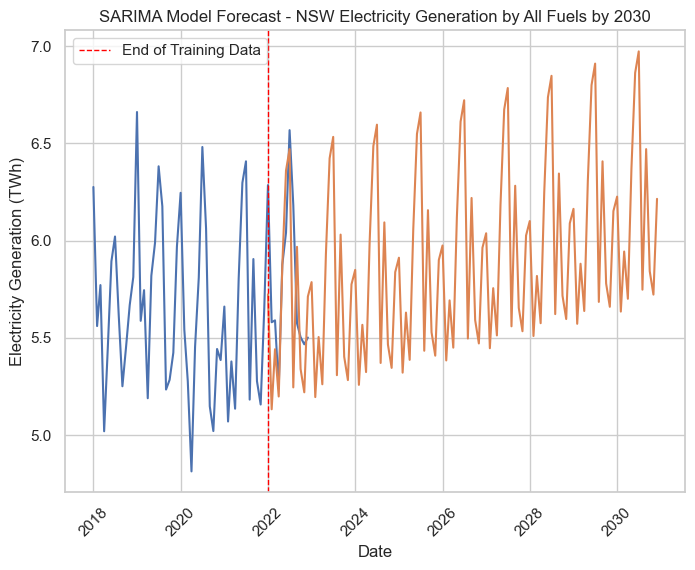

In [210]:
seasonal_model = SARIMAX(train_nswa, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_nswa = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_nswa, test_nswa, predicted_nswa], axis=0)
combined_data.to_csv('SARIMA_nswa.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_nswa.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - NSW Electricity Generation by All Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [211]:
df_nswr = df_seasonality[
    (~df_seasonality['Fuel Source'].isin(['Fossil', 'Battery storage'])) & 
    (df_seasonality['Region'] == 'NSW')
].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_nswr.set_index('Date', inplace=True)
df_nswr.index = pd.to_datetime(df_nswr.index)  # Convert index to datetime if not already

df_nswr.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.664625
2018-02-01                      0.645350
2018-03-01                      0.737492
2018-04-01                      0.676188
2018-05-01                      0.639876

In [212]:
df_nswr.index.freq = 'MS'

# Split the data into training and testing sets
train_nswr, test_nswr = train_test_split(df_nswr, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_nswr, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_nswr)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_nswr))

# Evaluate the model performance
mse = mean_squared_error(test_nswr, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-30.805, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-27.571, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-36.042, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-35.480, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-32.623, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-34.087, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-34.088, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-35.245, Time=0.06 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-32.086, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-31.793, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-34.048, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-34.056, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-35.833, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-33.980, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[12] intercep

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.06643D-01    |proj g|=  1.39019D+00

At iterate    5    f= -4.24794D-01    |proj g|=  2.05306D-01

At iterate   10    f= -4.37666D-01    |proj g|=  1.09929D-01

At iterate   15    f= -4.37788D-01    |proj g|=  6.74566D-02

At iterate   20    f= -4.37933D-01    |proj g|=  1.84741D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     29      1     0     0   4.005D-04  -4.379D-01
  F = -0.43793295823506745     

CONVERG

 This problem is unconstrained.


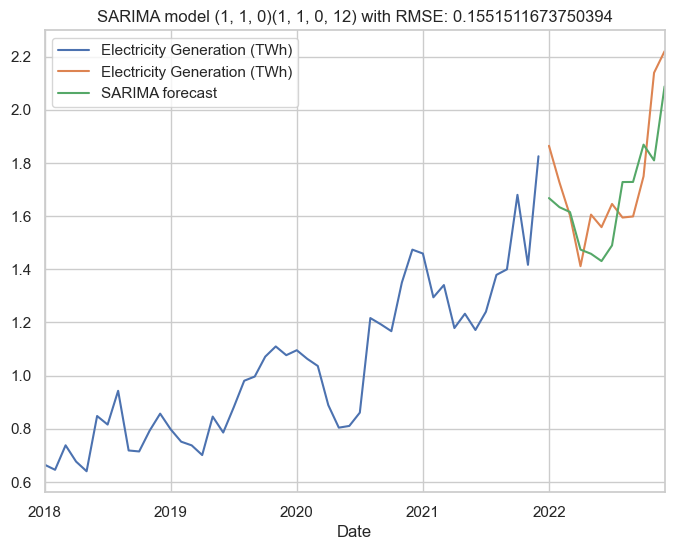

In [213]:
seasonal_model = SARIMAX(train_nswr, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')

fig, ax=plt.subplots(figsize=(8,6))

train_nswr.plot(ax = ax, label='train')
test_nswr.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_nswr,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.06643D-01    |proj g|=  1.39019D+00

At iterate    5    f= -4.24794D-01    |proj g|=  2.05306D-01

At iterate   10    f= -4.37666D-01    |proj g|=  1.09929D-01

At iterate   15    f= -4.37788D-01    |proj g|=  6.74566D-02

At iterate   20    f= -4.37933D-01    |proj g|=  1.84741D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     29      1     0     0   4.005D-04  -4.379D-01
  F = -0.43793295823506745     

CONVERG

 This problem is unconstrained.


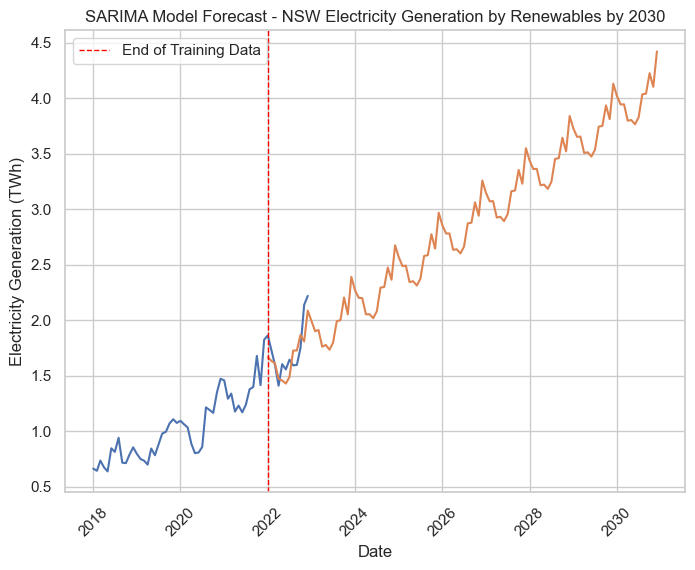

In [214]:
seasonal_model = SARIMAX(train_nswr, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_nswr = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_nswr, test_nswr, predicted_nswr], axis=0)
combined_data.to_csv('SARIMA_nswr.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_nswr.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - NSW Electricity Generation by Renewables by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

State Prediction - QLD

In [249]:
df_qlda = df_seasonality[df_seasonality['Region'] == 'QLD'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_qlda.set_index('Date', inplace=True)
df_qlda.index = pd.to_datetime(df_qlda.index)  # Convert index to datetime if not already

df_qlda.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      5.990934
2018-02-01                      5.333713
2018-03-01                      5.804342
2018-04-01                      5.483222
2018-05-01                      5.536858

In [250]:
df_qlda.index.freq = 'MS'

# Split the data into training and testing sets
train_qlda, test_qlda = train_test_split(df_qlda, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_qlda, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_qlda)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_qlda))

# Evaluate the model performance
mse = mean_squared_error(test_qlda, y_pred)
print("Mean Squared Error:", mse)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=13.127, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=16.763, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8.349, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=14.312, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8.399, Time=0.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=10.379, Time=0.51 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=14.198, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9.713, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=10.128, Time=0.22 sec

Be

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67110D-02    |proj g|=  9.18689D-01

At iterate    5    f=  4.96874D-02    |proj g|=  2.64631D-01

At iterate   10    f=  2.64956D-02    |proj g|=  1.01616D-01

At iterate   15    f=  2.44666D-02    |proj g|=  2.34963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   9.090D-05   2.447D-02
  F =   2.4466582034040469E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


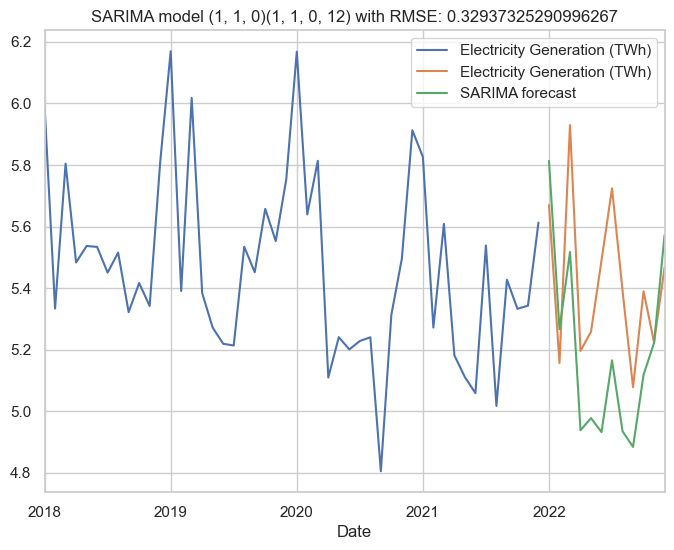

In [251]:
seasonal_model = SARIMAX(train_qlda, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_qlda.plot(ax = ax, label='train')
test_qlda.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_qlda,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67110D-02    |proj g|=  9.18689D-01

At iterate    5    f=  4.96874D-02    |proj g|=  2.64631D-01

At iterate   10    f=  2.64956D-02    |proj g|=  1.01616D-01

At iterate   15    f=  2.44666D-02    |proj g|=  2.34963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   9.090D-05   2.447D-02
  F =   2.4466582034040469E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


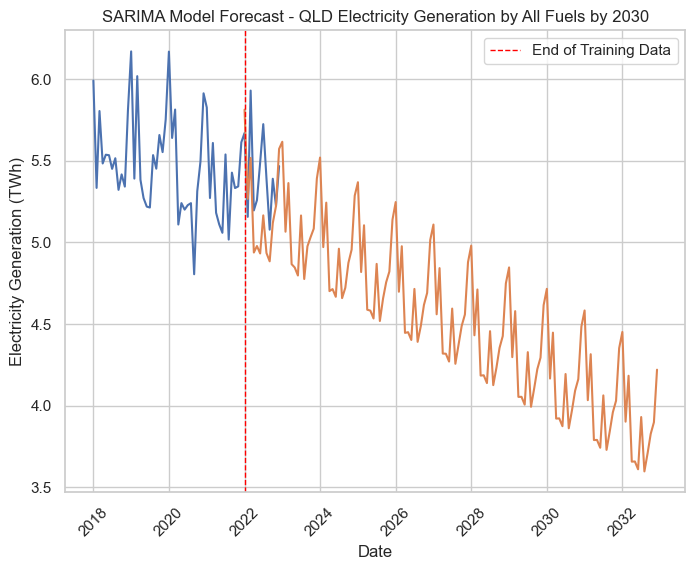

In [252]:
seasonal_model = SARIMAX(train_qlda, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 132  # Example: Forecasting till 2032

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_qlda = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_qlda, test_qlda, predicted_qlda], axis=0)
combined_data.to_csv('SARIMA_qlda.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_qlda.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - QLD Electricity Generation by All Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [253]:
df_qldr = df_seasonality[
    (~df_seasonality['Fuel Source'].isin(['Fossil', 'Battery storage'])) & 
    (df_seasonality['Region'] == 'QLD')
].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_qldr.set_index('Date', inplace=True)
df_qldr.index = pd.to_datetime(df_qldr.index)  

df_qldr.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.346889
2018-02-01                      0.316215
2018-03-01                      0.324607
2018-04-01                      0.323350
2018-05-01                      0.302088

In [254]:
df_qldr.index.freq = 'MS'

# Split the data into training and testing sets
train_qldr, test_qldr = train_test_split(df_qldr, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_qldr, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_qldr)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_qldr))

# Evaluate the model performance
mse = mean_squared_error(test_qldr, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-60.168, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-78.599, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-72.131, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-78.126, Time=0.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-76.513, Time=0.64 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-69.151, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-77.101, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-77.688, Time=0.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-79.446, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-75.798, Time=0.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-78.25

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.21414D-01    |proj g|=  1.61440D+00

At iterate    5    f= -8.34141D-01    |proj g|=  8.32953D-01

At iterate   10    f= -8.78241D-01    |proj g|=  6.39619D-02

At iterate   15    f= -8.89884D-01    |proj g|=  8.44794D-02

At iterate   20    f= -8.90066D-01    |proj g|=  9.41450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     34      1     0     0   9.415D-05  -8.901D-01
  F = -0.89006611598820629     

CONVERG

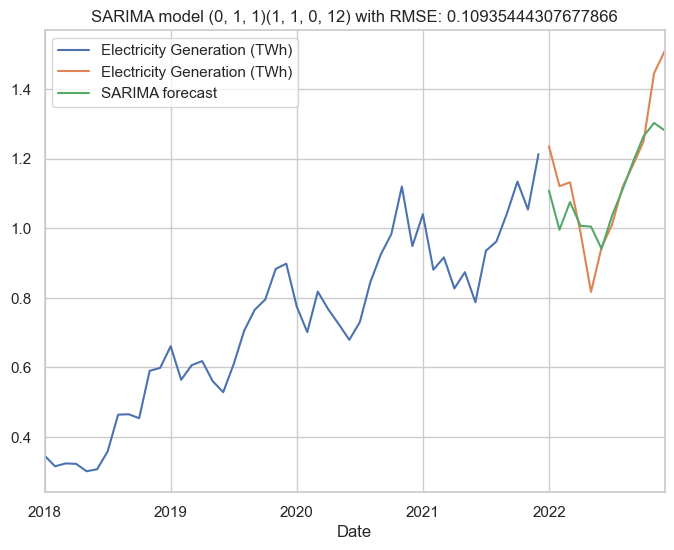

In [255]:
seasonal_model = SARIMAX(train_qldr, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')

fig, ax=plt.subplots(figsize=(8,6))

train_qldr.plot(ax = ax, label='train')
test_qldr.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_qldr,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.21414D-01    |proj g|=  1.61440D+00

At iterate    5    f= -8.34141D-01    |proj g|=  8.32953D-01

At iterate   10    f= -8.78241D-01    |proj g|=  6.39619D-02

At iterate   15    f= -8.89884D-01    |proj g|=  8.44794D-02

At iterate   20    f= -8.90066D-01    |proj g|=  9.41450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     34      1     0     0   9.415D-05  -8.901D-01
  F = -0.89006611598820629     

CONVERG

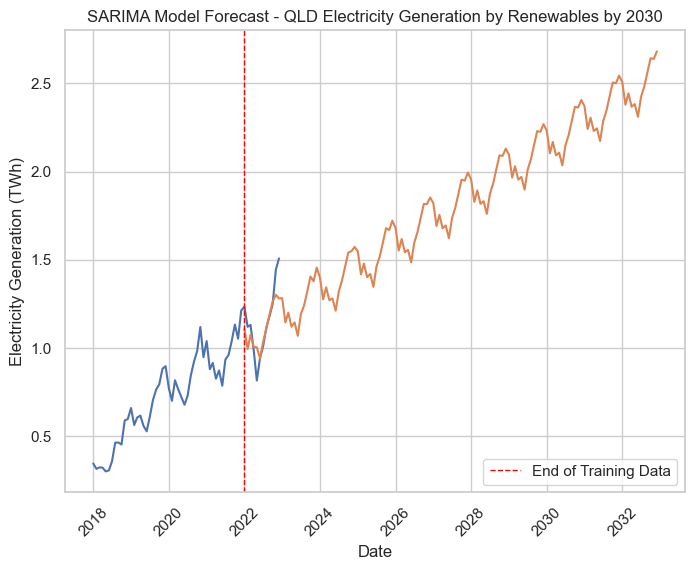

In [256]:
seasonal_model = SARIMAX(train_qldr, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 132  # Example: Forecasting till 2032

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_qldr = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_qldr, test_qldr, predicted_qldr], axis=0)
combined_data.to_csv('SARIMA_qldr.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_qldr.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - QLD Electricity Generation by Renewables by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

State Prediction - VIC

In [223]:
df_vica = df_seasonality[df_seasonality['Region'] == 'VIC'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_vica.set_index('Date', inplace=True)
df_vica.index = pd.to_datetime(df_vica.index)  # Convert index to datetime if not already

df_vica.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      4.191104
2018-02-01                      3.706189
2018-03-01                      3.748581
2018-04-01                      3.795529
2018-05-01                      4.248204

In [224]:
df_vica.index.freq = 'MS'

# Split the data into training and testing sets
train_vica, test_vica = train_test_split(df_vica, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_vica, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_vica)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_vica))

# Evaluate the model performance
mse = mean_squared_error(test_vica, y_pred)
print("Mean Squared Error:", mse)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=24.013, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=25.049, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6.689, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6.043, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=7.535, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=7.009, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=7.009, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5.009, Time=0.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7.009, Time=0.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=9.009, Time=0.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=23.199, Time=0.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=5.195, Time=0.11 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=5.979, Time=0.14 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=7.129, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.16 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49479D-03    |proj g|=  4.94070D-01

At iterate    5    f= -8.46823D-03    |proj g|=  8.48721D-02

At iterate   10    f= -1.02723D-02    |proj g|=  7.79409D-03

At iterate   15    f= -1.03184D-02    |proj g|=  2.58432D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   1.344D-05  -1.032D-02
  F =  -1.0318444830815518E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


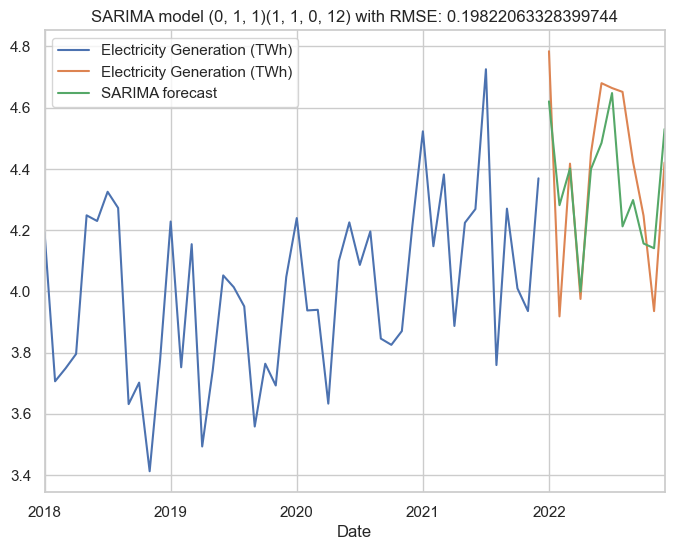

In [225]:
seasonal_model = SARIMAX(train_vica, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_vica.plot(ax = ax, label='train')
test_vica.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_vica,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49479D-03    |proj g|=  4.94070D-01

At iterate    5    f= -8.46823D-03    |proj g|=  8.48721D-02

At iterate   10    f= -1.02723D-02    |proj g|=  7.79409D-03

At iterate   15    f= -1.03184D-02    |proj g|=  2.58432D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   1.344D-05  -1.032D-02
  F =  -1.0318444830815518E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


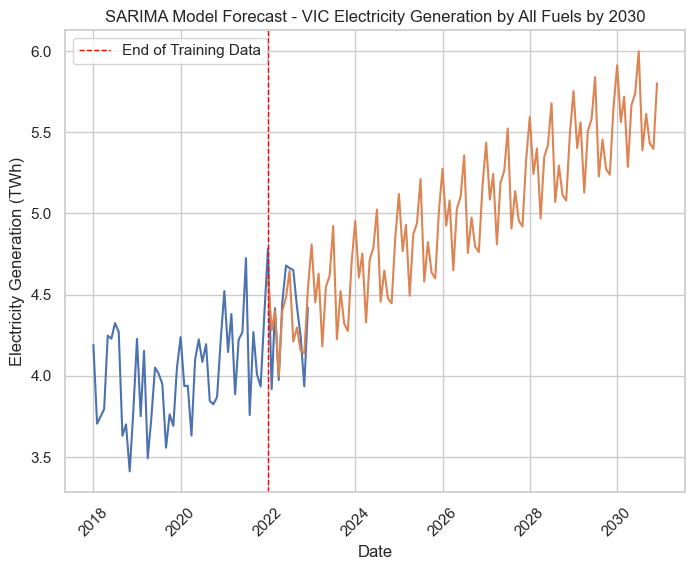

In [226]:
seasonal_model = SARIMAX(train_vica, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_vica = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_vica, test_vica, predicted_vica], axis=0)
combined_data.to_csv('SARIMA_vica.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_vica.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - VIC Electricity Generation by All Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [227]:
df_vicr = df_seasonality[
    (~df_seasonality['Fuel Source'].isin(['Fossil', 'Battery storage'])) & 
    (df_seasonality['Region'] == 'VIC')
].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_vicr.set_index('Date', inplace=True)
df_vicr.index = pd.to_datetime(df_vicr.index)  

df_vicr.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.706550
2018-02-01                      0.596388
2018-03-01                      0.668935
2018-04-01                      0.585895
2018-05-01                      0.827493

In [228]:
df_vicr.index.freq = 'MS'

# Split the data into training and testing sets
train_vicr, test_vicr = train_test_split(df_vicr, train_size=0.8)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_vicr, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_vicr)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_vicr))

# Evaluate the model performance
mse = mean_squared_error(test_vicr, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-33.698, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-55.113, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-37.999, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-53.156, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-53.156, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-51.156, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-53.866, Time=0.07 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-53.304, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-54.158, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-55.764, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-45.250, Time=0.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.04769D-01    |proj g|=  3.09672D+00

At iterate    5    f= -5.44934D-01    |proj g|=  1.21951D+00

At iterate   10    f= -6.41702D-01    |proj g|=  5.29891D-01

At iterate   15    f= -6.43378D-01    |proj g|=  8.29683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     35      1     0     0   6.938D-04  -6.434D-01
  F = -0.64337754607462194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


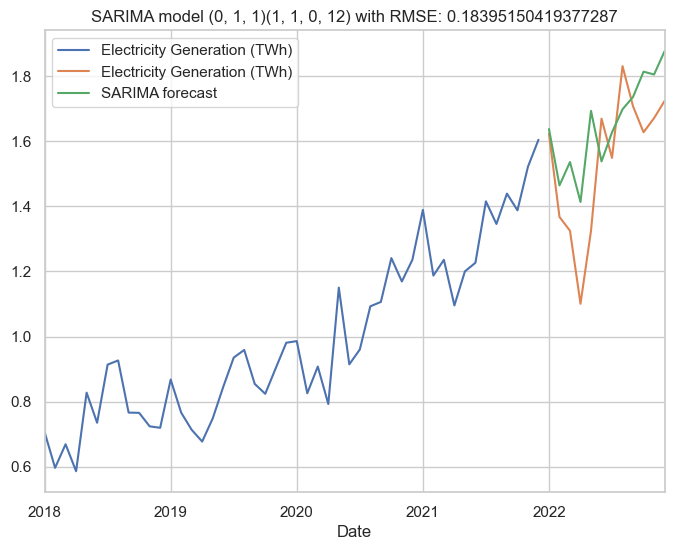

In [229]:
seasonal_model = SARIMAX(train_vicr, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')

fig, ax=plt.subplots(figsize=(8,6))

train_vicr.plot(ax = ax, label='train')
test_vicr.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_vicr,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.04769D-01    |proj g|=  3.09672D+00

At iterate    5    f= -5.44934D-01    |proj g|=  1.21951D+00

At iterate   10    f= -6.41702D-01    |proj g|=  5.29891D-01

At iterate   15    f= -6.43378D-01    |proj g|=  8.29683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     35      1     0     0   6.938D-04  -6.434D-01
  F = -0.64337754607462194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


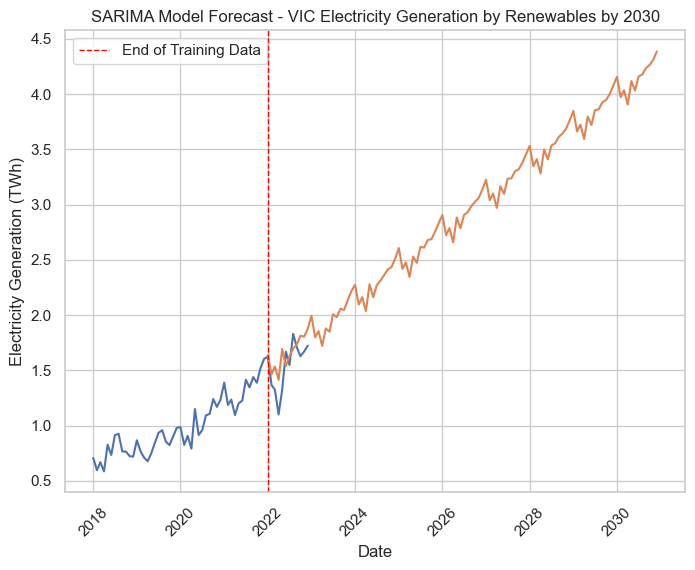

In [231]:
seasonal_model = SARIMAX(train_vicr, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_vicr = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_vicr, test_vicr, predicted_vicr], axis=0)
combined_data.to_csv('SARIMA_vicr.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_vicr.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - VIC Electricity Generation by Renewables by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

State Prediction - SA

In [232]:
df_saa = df_seasonality[df_seasonality['Region'] == 'SA'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_saa.set_index('Date', inplace=True)
df_saa.index = pd.to_datetime(df_saa.index)  # Convert index to datetime if not already

df_saa.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      1.239125
2018-02-01                      1.066610
2018-03-01                      1.081452
2018-04-01                      0.963894
2018-05-01                      1.005462

In [288]:
df_saa.index.freq = 'MS'

# Split the data into training and testing sets
train_saa, test_saa = train_test_split(df_saa, train_size=0.9)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_saa, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_saa)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_saa))

# Evaluate the model performance
mse = mean_squared_error(test_saa, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-64.009, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-61.656, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-69.424, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-73.636, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-71.335, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-71.743, Time=0.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-72.749, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-71.777, Time=0.12 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-71.775, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-69.383, Time=0.07 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-70.234, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-71.702, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]    

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.92804D-01    |proj g|=  5.44861D-01

At iterate    5    f= -7.21749D-01    |proj g|=  1.73177D+00

At iterate   10    f= -7.37339D-01    |proj g|=  7.77032D-03

At iterate   15    f= -7.37370D-01    |proj g|=  1.35579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     30      1     0     0   1.029D-03  -7.374D-01
  F = -0.73736980853662104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


ValueError: Found input variables with inconsistent numbers of samples: [6, 12]

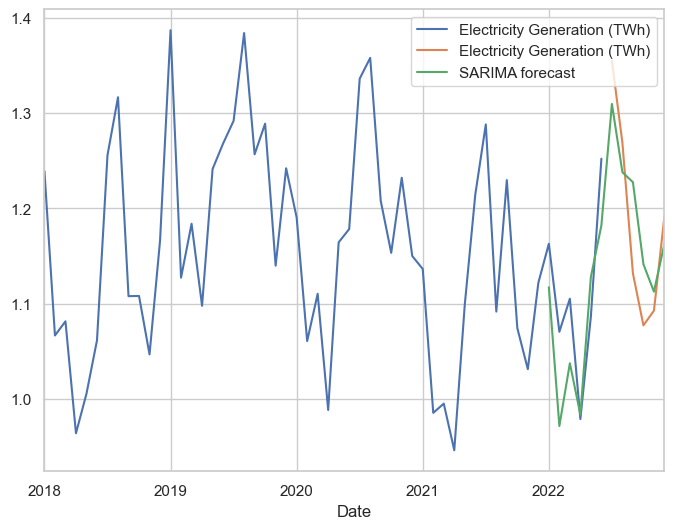

In [289]:
seasonal_model = SARIMAX(train_saa, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_saa.plot(ax = ax, label='train')
test_saa.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_saa,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.92804D-01    |proj g|=  5.44861D-01

At iterate    5    f= -7.21749D-01    |proj g|=  1.73177D+00

At iterate   10    f= -7.37339D-01    |proj g|=  7.77032D-03

At iterate   15    f= -7.37370D-01    |proj g|=  1.35579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     30      1     0     0   1.029D-03  -7.374D-01
  F = -0.73736980853662104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


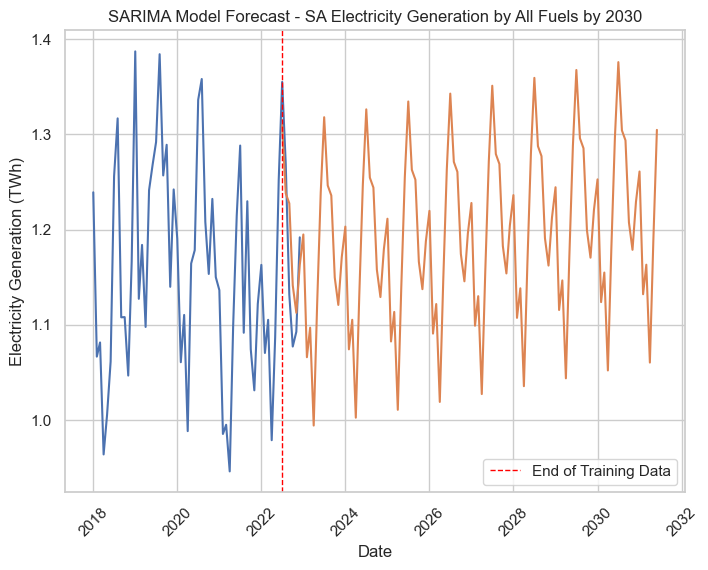

In [290]:
seasonal_model = SARIMAX(train_saa, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_saa = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_saa, test_saa, predicted_saa], axis=0)
combined_data.to_csv('SARIMA_saa.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_saa.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - SA Electricity Generation by All Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [236]:
df_sar = df_seasonality[
    (~df_seasonality['Fuel Source'].isin(['Fossil', 'Battery storage'])) & 
    (df_seasonality['Region'] == 'SA')
].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_sar.set_index('Date', inplace=True)
df_sar.index = pd.to_datetime(df_sar.index)  

df_sar.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.589307
2018-02-01                      0.503999
2018-03-01                      0.577135
2018-04-01                      0.463020
2018-05-01                      0.533868

In [291]:
df_sar.index.freq = 'MS'

# Split the data into training and testing sets
train_sar, test_sar = train_test_split(df_sar, train_size=0.9)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_sar, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_sar)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_sar))

# Evaluate the model performance
mse = mean_squared_error(test_sar, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-61.624, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-72.810, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-67.482, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-75.901, Time=0.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-73.917, Time=0.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-73.336, Time=0.24 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-77.901, Time=0.56 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-73.832, Time=0.15 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=-75.900, Time=0.47 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-76.553, Time=0.47 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, T

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.84004D-01    |proj g|=  3.73876D+00

At iterate    5    f= -8.45488D-01    |proj g|=  1.60353D-01

At iterate   10    f= -8.77942D-01    |proj g|=  6.94163D-01

At iterate   15    f= -8.82030D-01    |proj g|=  5.57322D-01

At iterate   20    f= -8.89280D-01    |proj g|=  9.66972D-02

At iterate   25    f= -8.90871D-01    |proj g|=  4.05343D-01

At iterate   30    f= -8.93693D-01    |proj g|=  1.58942D-02

At iterate   35    f= -8.95432D-01    |proj g|=  2.82672D-02

At iterate   40    f= -8.95698D-01    |proj g|=  2.55412D-03

At iterate   45    f= -8.95715D-01    |proj g|=  4.43729D-03

At iterate   50    f= -8.95865D-01    |proj g|=  6.18389D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ValueError: Found input variables with inconsistent numbers of samples: [6, 12]

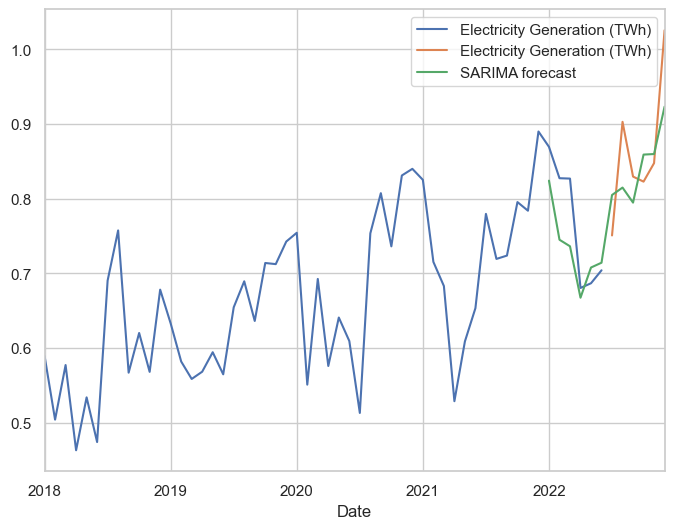

In [292]:
seasonal_model = SARIMAX(train_sar, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')

fig, ax=plt.subplots(figsize=(8,6))

train_sar.plot(ax = ax, label='train')
test_sar.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_sar,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.84004D-01    |proj g|=  3.73876D+00

At iterate    5    f= -8.45488D-01    |proj g|=  1.60353D-01

At iterate   10    f= -8.77942D-01    |proj g|=  6.94163D-01

At iterate   15    f= -8.82030D-01    |proj g|=  5.57322D-01

At iterate   20    f= -8.89280D-01    |proj g|=  9.66972D-02

At iterate   25    f= -8.90871D-01    |proj g|=  4.05343D-01

At iterate   30    f= -8.93693D-01    |proj g|=  1.58942D-02

At iterate   35    f= -8.95432D-01    |proj g|=  2.82672D-02

At iterate   40    f= -8.95698D-01    |proj g|=  2.55412D-03

At iterate   45    f= -8.95715D-01    |proj g|=  4.43729D-03

At iterate   50    f= -8.95865D-01    |proj g|=  6.18389D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


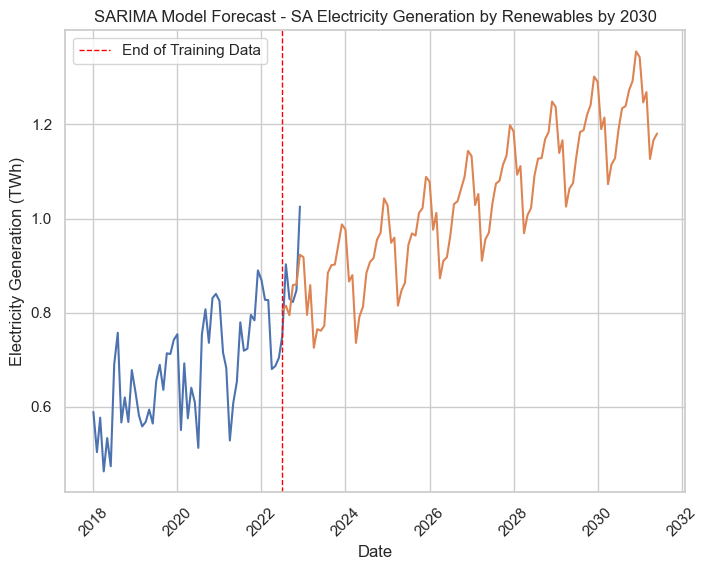

In [293]:
seasonal_model = SARIMAX(train_sar, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_sar = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_sar, test_sar, predicted_sar], axis=0)
combined_data.to_csv('SARIMA_sar.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_sar.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - SA Electricity Generation by Renewables by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [241]:
df_tasa = df_seasonality[df_seasonality['Region'] == 'TAS'].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_tasa.set_index('Date', inplace=True)
df_tasa.index = pd.to_datetime(df_tasa.index)  # Convert index to datetime if not already

df_tasa.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.803192
2018-02-01                      0.721986
2018-03-01                      0.797936
2018-04-01                      0.877248
2018-05-01                      0.977963

In [281]:
df_tasa.index.freq = 'MS'

# Split the data into training and testing sets
train_tasa, test_tasa = train_test_split(df_tasa, train_size=0.9)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_tasa, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_tasa)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_tasa))

# Evaluate the model performance
mse = mean_squared_error(test_tasa, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-39.707, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-37.948, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-36.243, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-38.241, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-37.737, Time=0.04 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-37.952, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-42.410, Time=0.28 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-40.837, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-40.451, Time=0.20 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Mean Squared Error: 0.048584825159060596


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17231D-01    |proj g|=  6.71336D-01

At iterate    5    f= -4.40168D-01    |proj g|=  1.28997D+00

At iterate   10    f= -4.64934D-01    |proj g|=  6.55326D-02

At iterate   15    f= -4.65703D-01    |proj g|=  1.03531D-01

At iterate   20    f= -4.65909D-01    |proj g|=  1.25881D-02

At iterate   25    f= -4.66711D-01    |proj g|=  7.25410D-03

At iterate   30    f= -4.66756D-01    |proj g|=  6.65471D-03

At iterate   35    f= -4.66756D-01    |proj g|=  2.43669D-03

At iterate   40    f= -4.66756D-01    |proj g|=  7.35999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

ValueError: Found input variables with inconsistent numbers of samples: [6, 12]

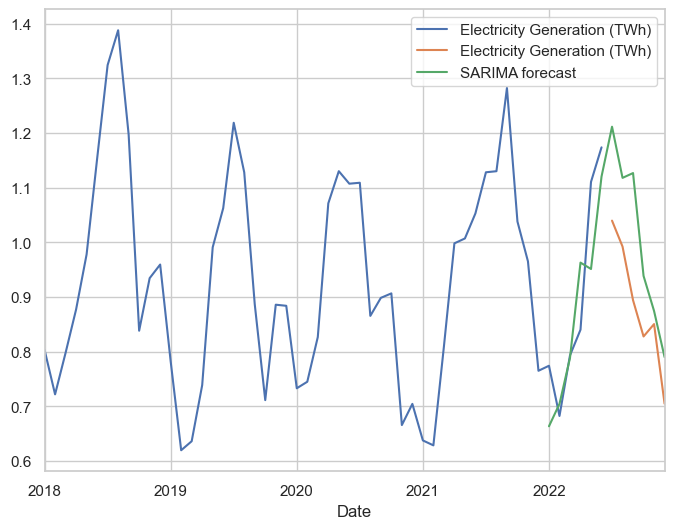

In [282]:
seasonal_model = SARIMAX(train_tasa, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')


fig, ax=plt.subplots(figsize=(8,6))

train_tasa.plot(ax = ax, label='train')
test_tasa.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_tasa,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17231D-01    |proj g|=  6.71336D-01

At iterate    5    f= -4.40168D-01    |proj g|=  1.28997D+00

At iterate   10    f= -4.64934D-01    |proj g|=  6.55326D-02

At iterate   15    f= -4.65703D-01    |proj g|=  1.03531D-01

At iterate   20    f= -4.65909D-01    |proj g|=  1.25881D-02

At iterate   25    f= -4.66711D-01    |proj g|=  7.25410D-03

At iterate   30    f= -4.66756D-01    |proj g|=  6.65471D-03

At iterate   35    f= -4.66756D-01    |proj g|=  2.43669D-03

At iterate   40    f= -4.66756D-01    |proj g|=  7.35999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

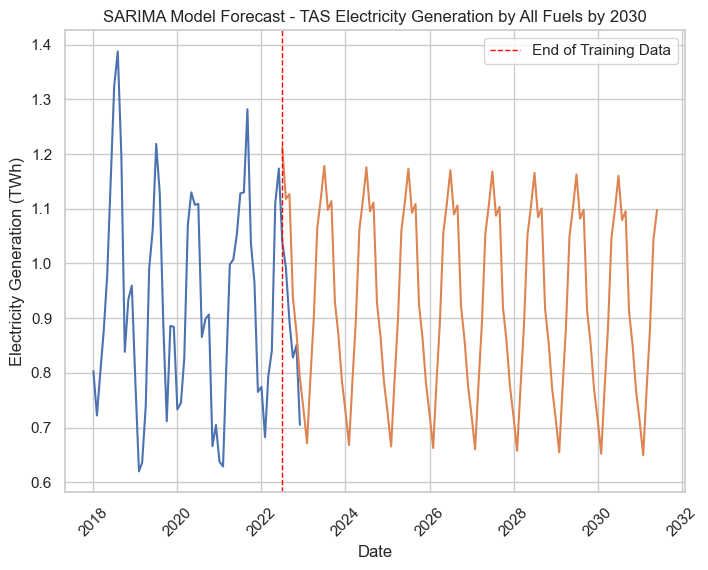

In [283]:
seasonal_model = SARIMAX(train_tasa, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_tasa = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_tasa, test_tasa, predicted_tasa], axis=0)
combined_data.to_csv('SARIMA_tasa.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_tasa.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - TAS Electricity Generation by All Fuels by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [284]:
df_tasr = df_seasonality[
    (~df_seasonality['Fuel Source'].isin(['Fossil', 'Battery storage'])) & 
    (df_seasonality['Region'] == 'TAS')
].groupby('Date')['Electricity Generation (TWh)'].sum().reset_index()

df_tasr.set_index('Date', inplace=True)
df_tasr.index = pd.to_datetime(df_tasr.index)  

df_tasr.head()

Electricity Generation (TWh)
Date                                    
2018-01-01                      0.651669
2018-02-01                      0.588947
2018-03-01                      0.674523
2018-04-01                      0.872811
2018-05-01                      0.977397

In [285]:
df_tasr.index.freq = 'MS'

# Split the data into training and testing sets
train_tasr, test_tasr = train_test_split(df_tasr, train_size=0.9)

# Perform grid search to find the best SARIMA parameters
model = pm.auto_arima(train_tasr, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the best SARIMA parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA parameters:")
print("Order:", best_order)
print("Seasonal Order:", best_seasonal_order)

# Fit the SARIMA model with the best parameters
best_model = pm.ARIMA(order=best_order, seasonal_order=best_seasonal_order)
best_model.fit(train_tasr)

# Generate predictions on the test data
y_pred = best_model.predict(n_periods=len(test_tasr))

# Evaluate the model performance
mse = mean_squared_error(test_tasr, y_pred)
print("Mean Squared Error:", mse)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-36.668, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-32.731, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-32.238, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-34.779, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-34.069, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-34.726, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=-34.669, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 1.429 seconds
Best SARIMA parameters:
Order: (0, 1, 0)
Seasonal Order: (0, 1, 1, 12)
Mean Squared Error: 0.04603458092934992


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.98347D-01    |proj g|=  2.21461D+00

At iterate    5    f= -3.70602D-01    |proj g|=  6.95962D-01

At iterate   10    f= -3.76556D-01    |proj g|=  2.51538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     19      1     0     0   1.778D-04  -3.766D-01
  F = -0.37655667835404616     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


ValueError: Found input variables with inconsistent numbers of samples: [6, 12]

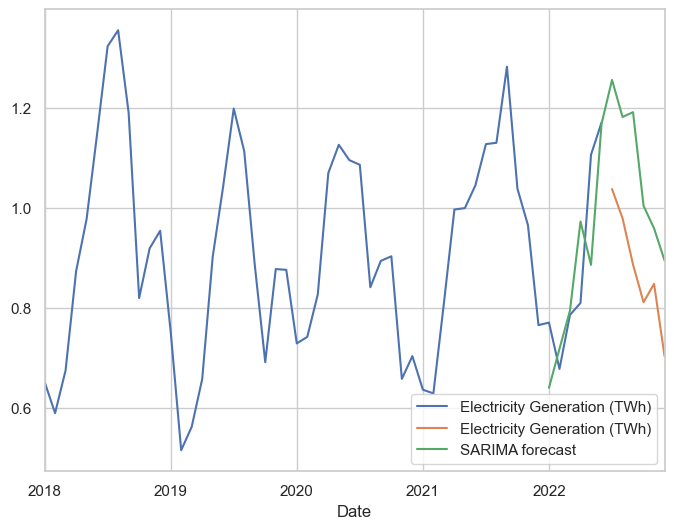

In [286]:
seasonal_model = SARIMAX(train_tasr, order=best_order, seasonal_order=best_seasonal_order).fit()

y_pred_seasonal = seasonal_model.predict(start='2022-01-01', end='2022-12-01')

fig, ax=plt.subplots(figsize=(8,6))

train_tasr.plot(ax = ax, label='train')
test_tasr.plot(ax = ax, label='test')
y_pred_seasonal.plot(ax=ax, label='SARIMA forecast')
ax.legend()

rsme = np.sqrt(mean_squared_error(test_tasr,y_pred_seasonal))
ax.set_title(f'SARIMA model {best_order}{best_seasonal_order} with RMSE: {rsme}')

plt.show()

/Users/Yifee/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.98347D-01    |proj g|=  2.21461D+00

At iterate    5    f= -3.70602D-01    |proj g|=  6.95962D-01

At iterate   10    f= -3.76556D-01    |proj g|=  2.51538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     19      1     0     0   1.778D-04  -3.766D-01
  F = -0.37655667835404616     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


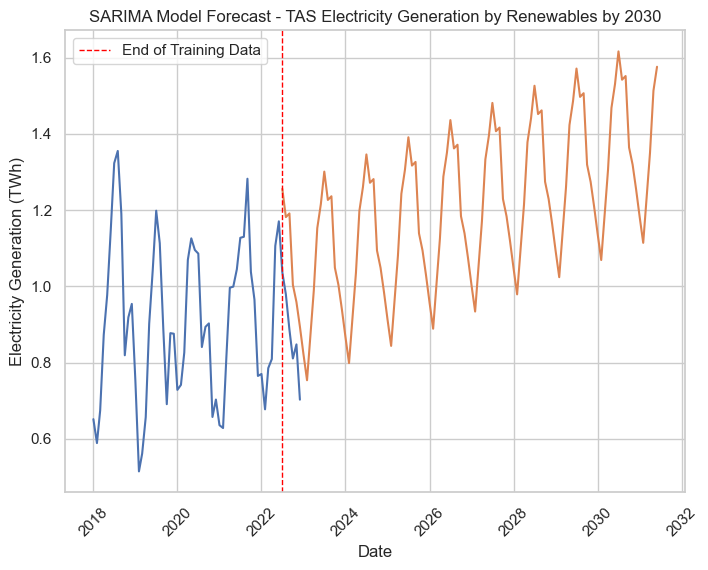

In [287]:
seasonal_model = SARIMAX(train_tasr, order=best_order, seasonal_order=best_seasonal_order).fit()

# Specify the number of steps to forecast into the future
forecast_steps = 108  # Example: Forecasting 12 steps ahead

# Use the trained SARIMA model to make future predictions
future_forecast = seasonal_model.get_forecast(steps=forecast_steps)

# Extract the predicted values
predicted_tasr = future_forecast.predicted_mean


# Combine the predicted values with the actual data
combined_data = pd.concat([train_tasr, test_tasr, predicted_tasr], axis=0)
combined_data.to_csv('SARIMA_tasr.csv', index=False)

# Plot the combined data
plt.figure(figsize=(8, 6))
plt.plot(combined_data.index, combined_data)
plt.axvline(x=test_tasr.index[0], color='red', linestyle='--', linewidth=1, label='End of Training Data')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (TWh)')
plt.title('SARIMA Model Forecast - TAS Electricity Generation by Renewables by 2030')
plt.legend()
plt.xticks(rotation=45)
plt.show()